<a href="https://colab.research.google.com/github/Debahacker/Debanjan_Dan_Data_Analytics/blob/main/COVID_19_Hospitalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧾 Project Overview

This project focuses on **COVID-19 patient survival prediction** using real-world health data.  
The analysis is divided into **6 tracks**:

1. **Data Preprocessing & EDA** – cleaning and understanding the dataset.  
2. **Predictive Modeling** – training an XGBoost classifier.  
3. **Survival Analysis** – estimating hazard ratios via Cox Proportional Hazards.  
4. **Explainability & Trust** – SHAP, calibration, and uncertainty quantification.  
5. **Scenario Simulation** – What-If counterfactuals to explore treatment/condition effects.  
6. **Conclusions & Insights** – summarizing findings and implications.  

Each section blends **statistical rigor** with **practical insights**, making this project both scientifically robust and clinically interpretable.


# COVID-19 Survival Prediction Project

## 1. Introduction
- Motivation
- Dataset Overview
- Project Tracks

## 2. Track 1: Data Preprocessing & EDA
- Missing Value Handling
- Feature Engineering
- Exploratory Insights

## 3. Track 2: Predictive Modeling
- XGBoost Classification
- Model Performance (ROC, AUC, Accuracy)

## 4. Track 3: Survival Analysis
- Cox Proportional Hazards Model
- Kaplan-Meier Curves
- Partial Effects of Risk Factors

## 5. Track 4: Explainability & Trust
- SHAP Interpretability
- Misclassified Case Analysis
- Calibration & Uncertainty Metrics
- Prediction Interval Visualizations

## 6. Track 5: Scenario Simulation
- What-If Analysis (Counterfactuals)
- Survival Curve Shifts
- Interactive Demo (Streamlit)

## 7. Track 6: Conclusions & Insights
- Key Findings
- Clinical Implications
- Limitations
- Future Work


In [1]:
import pandas as pd
#Load the dataset
df=pd.read_csv('/content/Covid Data.csv')
#Show first few rows
print(df.head(20))
#Show all column names
print(df.columns.tolist())
#Show the data types
print(df.dtypes)
#Show the shape
print(df.shape)

    USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0       2             1    1             1  03/05/2020       97        1.0   
1       2             1    2             1  03/06/2020       97        1.0   
2       2             1    2             2  09/06/2020        1        2.0   
3       2             1    1             1  12/06/2020       97        2.0   
4       2             1    2             1  21/06/2020       97        2.0   
5       2             1    1             2  9999-99-99        2        1.0   
6       2             1    1             1  9999-99-99       97        2.0   
7       2             1    1             1  9999-99-99       97        1.0   
8       2             1    1             2  9999-99-99        2        2.0   
9       2             1    1             2  9999-99-99        2        2.0   
10      2             1    1             1  9999-99-99       97        2.0   
11      2             1    2             2  9999-99-99        2 

# 🧠 COVID-19 Patient Outcome Prediction using Machine Learning

Welcome to this data science project where I aim to develop predictive models that can anticipate critical health outcomes for COVID-19 patients based on their medical profiles.

### 📌 Objective
The primary goal of this analysis is to **predict the likelihood of a patient requiring ICU support, intubation, or facing a fatal outcome** using patient-level data. This will help in:

- **Early identification of high-risk individuals**
- **Efficient resource allocation in hospitals**
- **Supporting clinical decision-making using data-driven insights**

### 📊 Dataset Overview
I am using a real-world COVID-19 dataset consisting of over 20 features related to:
- Patient demographics (age, sex, pregnancy)
- Medical history (diabetes, obesity, asthma, etc.)
- Hospital care and outcome indicators (ICU admission, intubation, mortality)

This rich dataset allows us to build classification models to assess:
- Whether a patient will be admitted to the **ICU**
- Whether they will require **intubation**
- Whether they will **survive or die**

---

### ⚙️ Workflow

1. **Data Cleaning & Preprocessing**
2. **Exploratory Data Analysis (EDA)**
3. **Feature Engineering**
4. **Model Training & Evaluation** (Logistic Regression, Random Forest, XGBoost, etc.)
5. **SHAP-based Explainability**
6. **Conclusion & Insights**

Let’s begin the journey toward building an impactful machine learning tool for healthcare forecasting.


In [2]:
#TRACK-1:ML_Modelling
#Inspecting the data
import pandas as pd
import numpy as np
#Get the column info
df.info()
#Check for null and unusal entries
df.replace("9999-99-99",np.nan,inplace=True) #Treat this as a missing date
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210229 entries, 0 to 210228
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   USMER                 210229 non-null  int64  
 1   MEDICAL_UNIT          210229 non-null  int64  
 2   SEX                   210229 non-null  int64  
 3   PATIENT_TYPE          210229 non-null  int64  
 4   DATE_DIED             210229 non-null  object 
 5   INTUBED               210229 non-null  int64  
 6   PNEUMONIA             210228 non-null  float64
 7   AGE                   210228 non-null  float64
 8   PREGNANT              210228 non-null  float64
 9   DIABETES              210228 non-null  float64
 10  COPD                  210228 non-null  float64
 11  ASTHMA                210228 non-null  float64
 12  INMSUPR               210228 non-null  float64
 13  HIPERTENSION          210228 non-null  float64
 14  OTHER_DISEASE         210228 non-null  float64
 15  

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               168822
INTUBED                      0
PNEUMONIA                    1
AGE                          1
PREGNANT                     1
DIABETES                     1
COPD                         1
ASTHMA                       1
INMSUPR                      1
HIPERTENSION                 1
OTHER_DISEASE                1
CARDIOVASCULAR               1
OBESITY                      1
RENAL_CHRONIC                1
TOBACCO                      1
CLASIFFICATION_FINAL         1
ICU                          1
dtype: int64

In [3]:
#Convert Death date to Binary Flag
#Create binary Death Label
df["DIED"]=df.DATE_DIED.notna().astype(int)
#DROP DATE_DIED
df.drop("DATE_DIED",axis=1,inplace=True)

In [4]:
#Convert all relevant columns to numeric(in case of object types)
for col in df.columns:
  df[col]= pd.to_numeric(df[col],errors="coerce")

In [5]:
#Drop rows with null values
df=df.dropna()
#Confirm the shape
df.shape

(210228, 21)

In [6]:
#Define features and target
target='ICU'
X = df.drop(target, axis=1)
y = df[target]

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in the data science process. It involves examining and visualizing datasets to understand their main characteristics, identify patterns, detect outliers, and check assumptions. EDA helps in gaining insights into the data before formal modeling.

Common techniques used in EDA include:

- **Descriptive Statistics:** Summarizing the main features of the data using measures like mean, median, standard deviation, etc.
- **Data Visualization:** Creating plots and charts (histograms, scatter plots, box plots, etc.) to visually represent the data distribution and relationships between variables.
- **Handling Missing Values:** Identifying and deciding how to handle missing data points.
- **Identifying Outliers:** Detecting unusual data points that may require further investigation.
- **Correlation Analysis:** Examining the relationships between different variables.

EDA is an iterative process that helps in formulating hypotheses, guiding feature engineering, and selecting appropriate models.

In [7]:
#Basic statistics for numerical features
df.describe()

USMER   MEDICAL_UNIT            SEX   PATIENT_TYPE  \
count  210228.000000  210228.000000  210228.000000  210228.000000   
mean        1.546278       3.905027       1.523232       1.343227   
std         0.497855       0.303102       0.499461       0.474788   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       4.000000       1.000000       1.000000   
50%         2.000000       4.000000       2.000000       1.000000   
75%         2.000000       4.000000       2.000000       2.000000   
max         2.000000       4.000000       2.000000       2.000000   

             INTUBED      PNEUMONIA            AGE       PREGNANT  \
count  210228.000000  210228.000000  210228.000000  210228.000000   
mean       64.862335       3.986538      45.172032      51.761963   
std        45.048486      14.461082      17.206830      47.452735   
min         1.000000       1.000000       0.000000       1.000000   
25%         2.000000       2.000000      32.000000       2.000000   
50%        97.000000       2.000000      44.000000      97.000000   
75%        97.000000       2.000000      57.000000      97.000000   
max        99.000000      99.000000     107.000000      98.000000   

            DIABETES           COPD  ...        INMSUPR   HIPERTENSION  \
count  210228.000000  210228.000000  ...  210228.000000  210228.000000   
mean        1.944698       2.093356  ...       2.098065       1.884611   
std         3.335564       3.305658  ...       3.331508       3.214687   
min         1.000000       1.000000  ...       1.000000       1.000000   
25%         2.000000       2.000000  ...       2.000000       2.000000   
50%         2.000000       2.000000  ...       2.000000       2.000000   
75%         2.000000       2.000000  ...       2.000000       2.000000   
max        98.000000      98.000000  ...      98.000000      98.000000   

       OTHER_DISEASE  CARDIOVASCULAR        OBESITY  RENAL_CHRONIC  \
count  210228.000000   210228.000000  210228.000000  210228.000000   
mean        2.071147        2.091791       1.897744       2.084261   
std         3.427908        3.339267       2.662782       3.327307   
min         1.000000        1.000000       1.000000       1.000000   
25%         2.000000        2.000000       2.000000       2.000000   
50%         2.000000        2.000000       2.000000       2.000000   
75%         2.000000        2.000000       2.000000       2.000000   
max        98.000000       98.000000      98.000000      98.000000   

             TOBACCO  CLASIFFICATION_FINAL            ICU           DIED  
count  210228.000000         210228.000000  210228.000000  210228.000000  
mean        2.047929              4.103079      64.940717       0.196962  
std         3.438143              1.540939      44.943569       0.397705  
min         1.000000              1.000000       1.000000       0.000000  
25%         2.000000              3.000000       2.000000       0.000000  
50%         2.000000              3.000000      97.000000       0.000000  
75%         2.000000              6.000000      97.000000       0.000000  
max        98.000000              7.000000      99.000000       1.000000  

[8 rows x 21 columns]

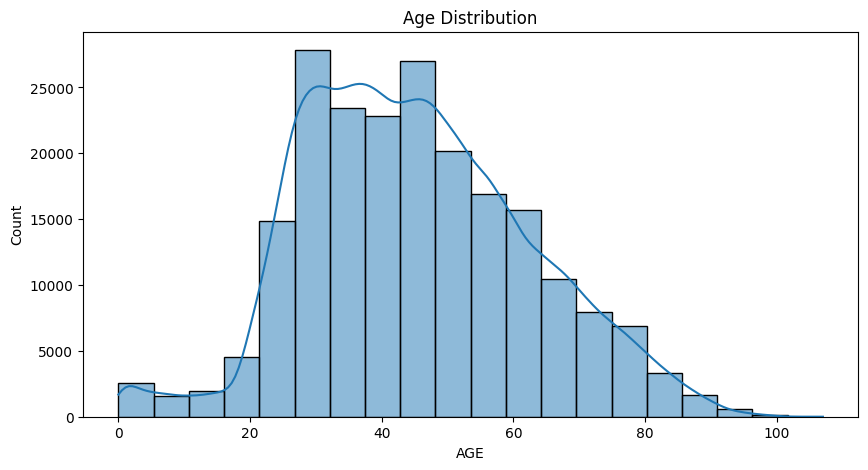

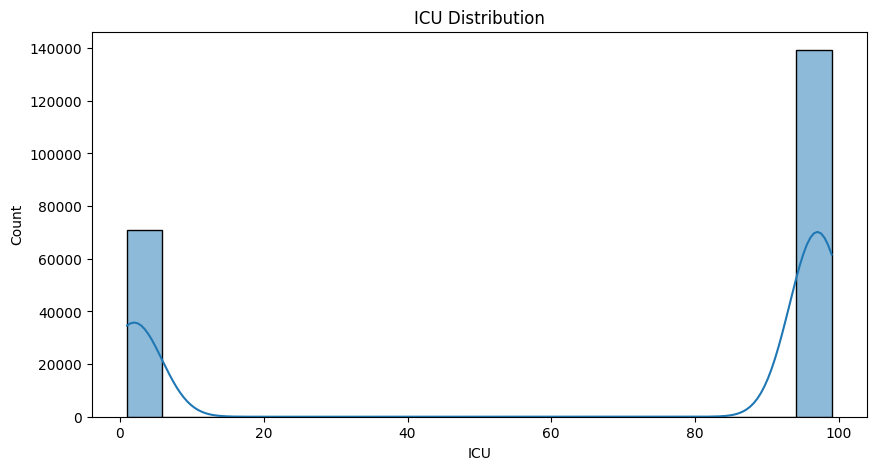

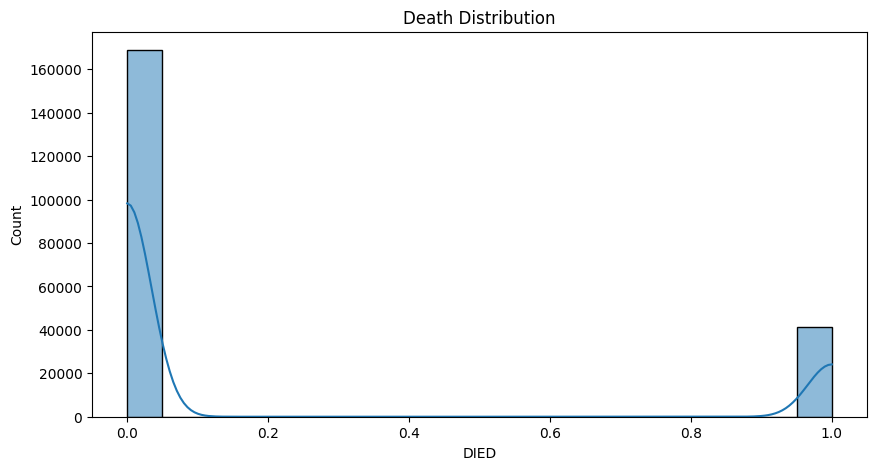

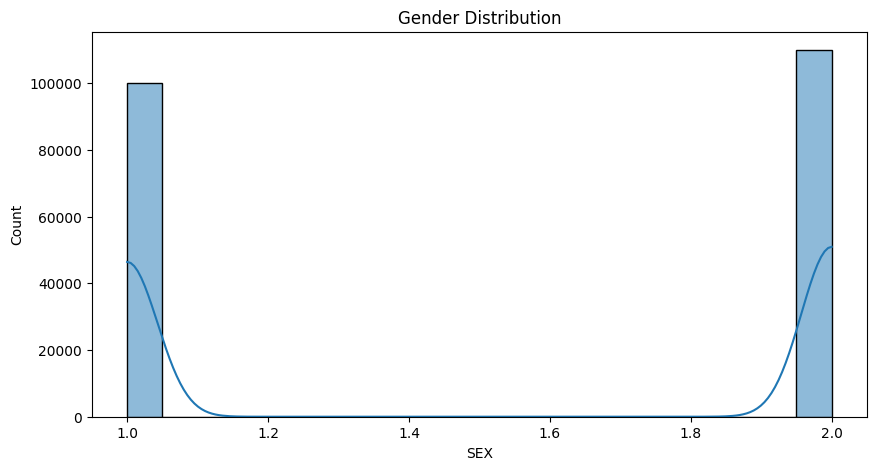

In [8]:
#Distribution of key features
import seaborn as sns
import matplotlib.pyplot as plt
#Age distribution
plt.figure(figsize=(10,5))
sns.histplot(df["AGE"],bins=20,kde=True)
plt.title("Age Distribution")
plt.show()
#ICU distribution
plt.figure(figsize=(10,5))
sns.histplot(df["ICU"],bins=20,kde=True)
plt.title("ICU Distribution")
plt.show()
#Death distribution
plt.figure(figsize=(10,5))
sns.histplot(df["DIED"],bins=20,kde=True)
plt.title("Death Distribution")
plt.show()
#Gender distribution
plt.figure(figsize=(10,5))
sns.histplot(df["SEX"],bins=20,kde=True)
plt.title("Gender Distribution")
plt.show()

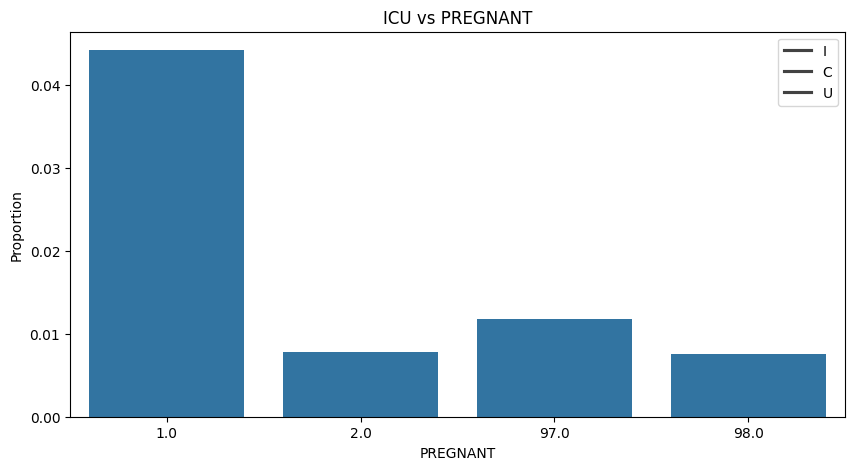

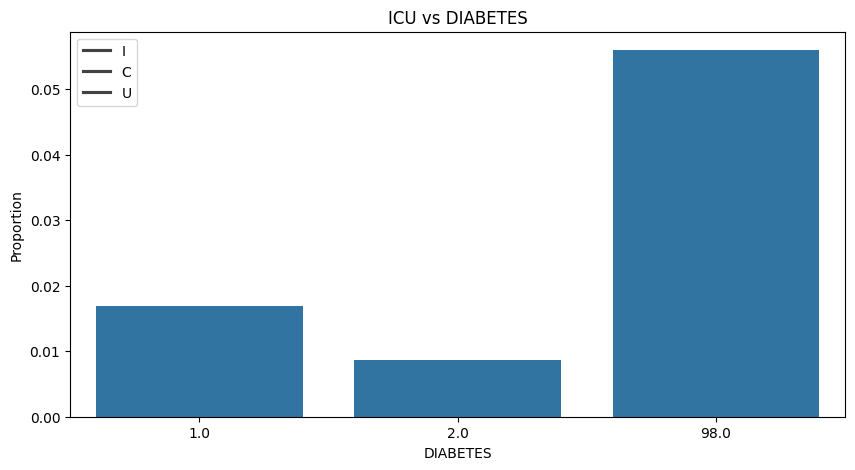

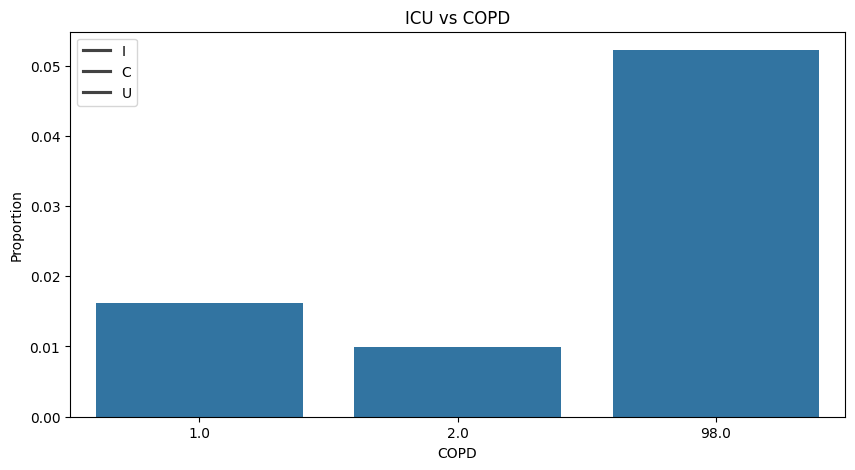

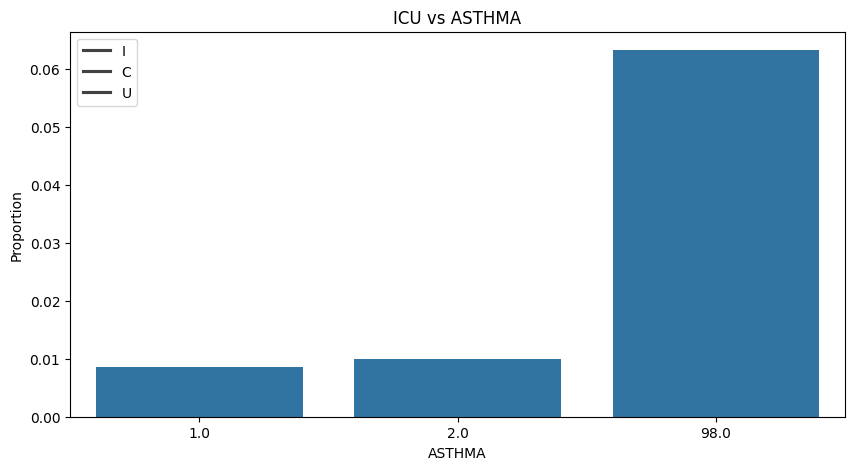

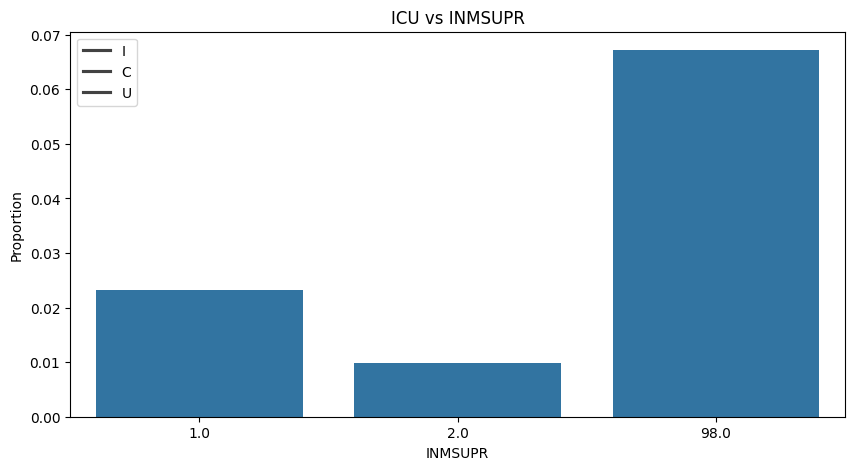

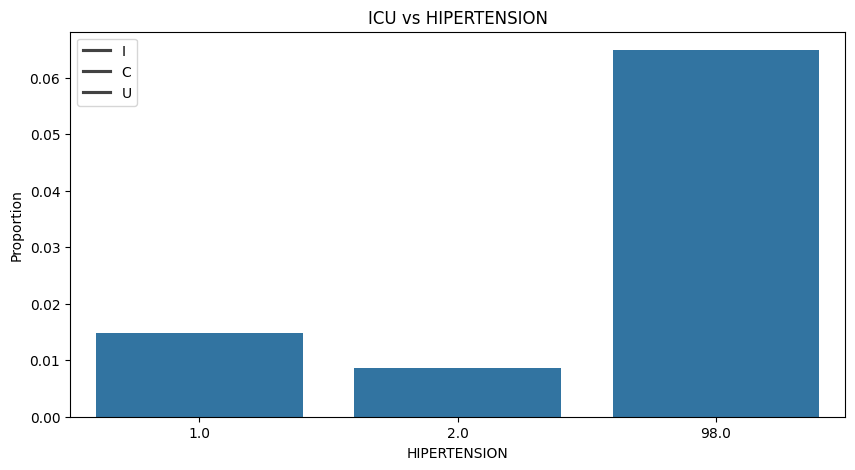

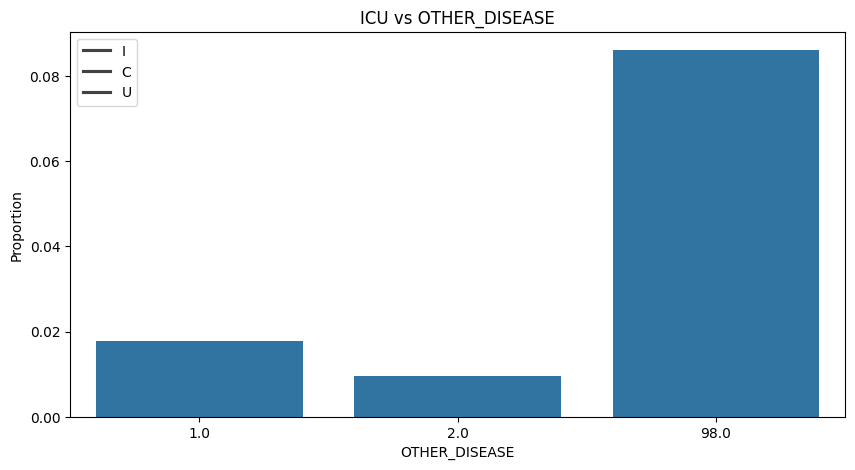

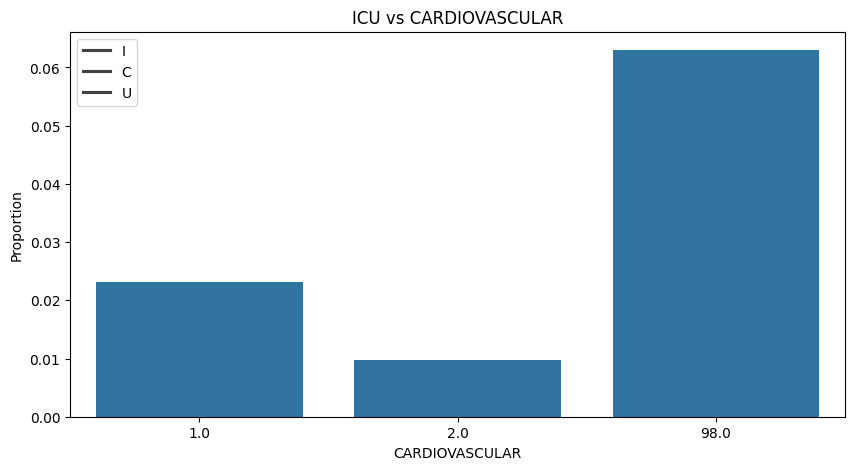

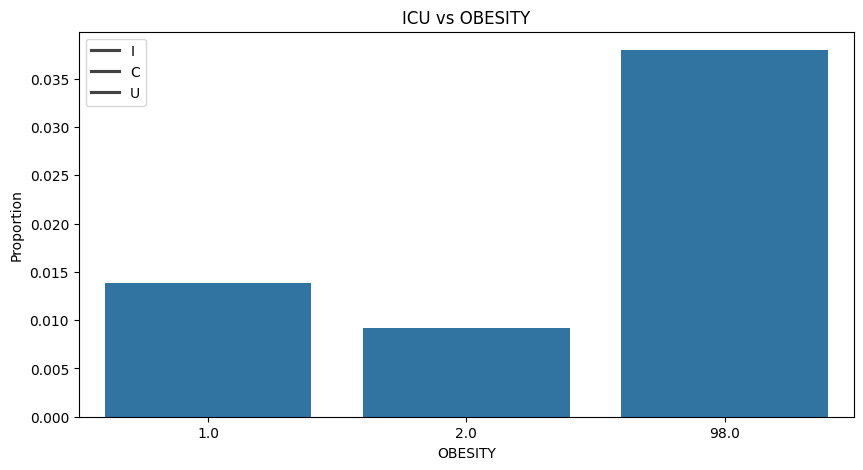

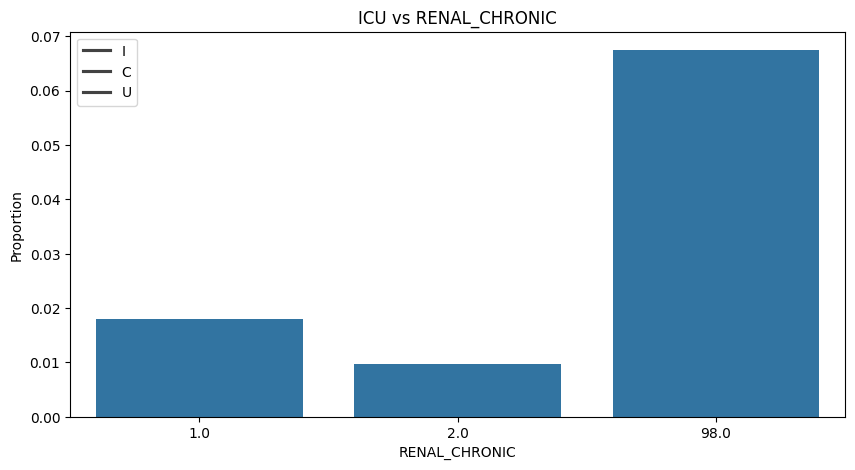

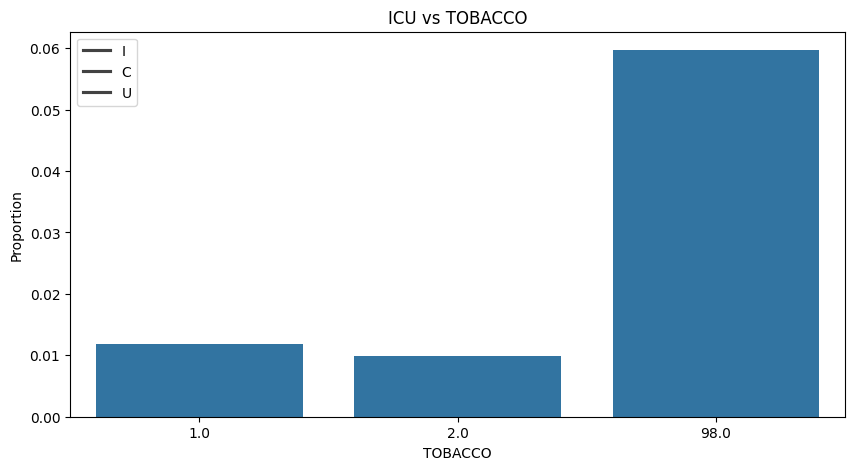

In [9]:
#COMORBIDITY vs ICU/Death
comorbidities=['PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']
#Plot ICU vs Comorbidities
for col in comorbidities:
  ctab=pd.crosstab(df[col],df["ICU"],normalize="index")
  plt.figure(figsize=(10,5))
  sns.barplot(x=ctab.index,y=ctab[1])
  plt.title(f"ICU vs {col}")
  plt.ylabel("Proportion")
  plt.legend("ICU")
  plt.show()

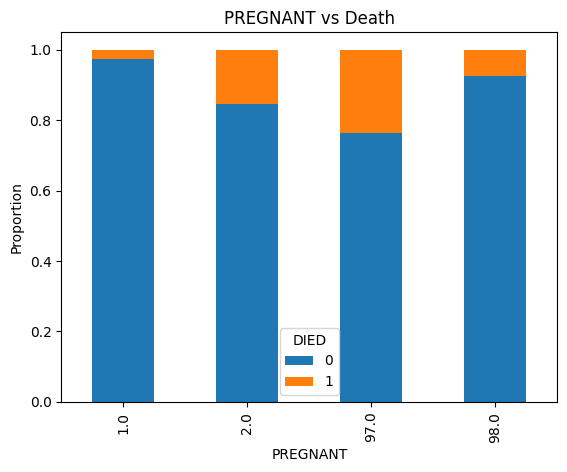

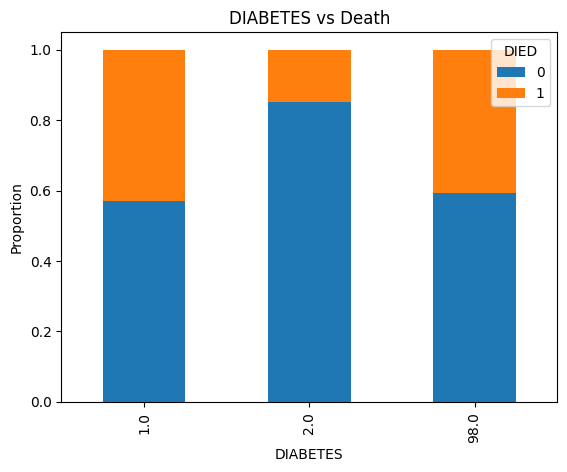

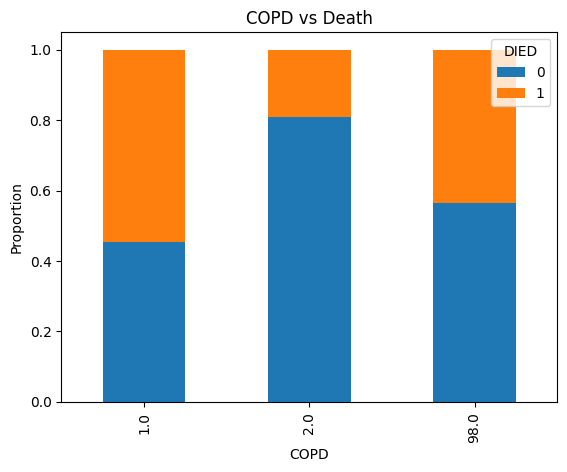

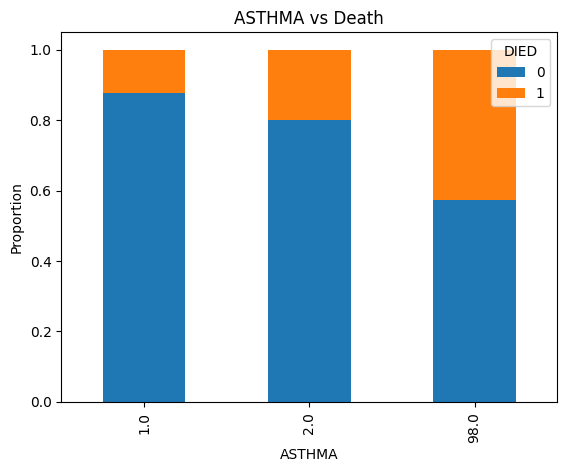

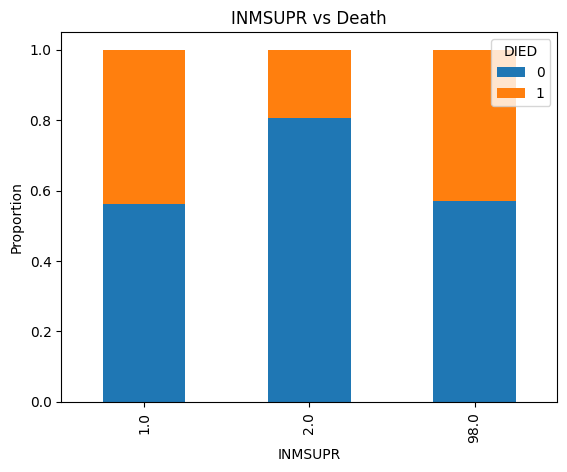

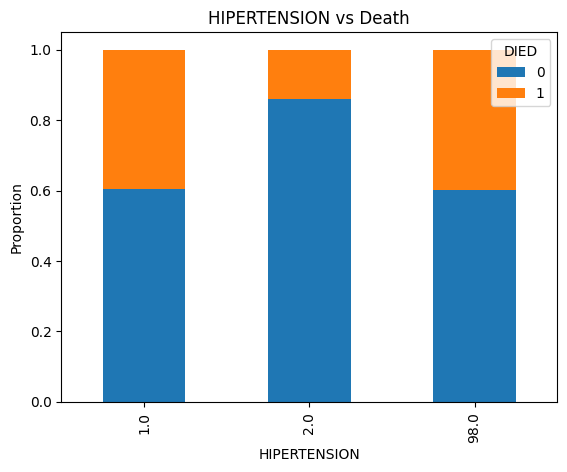

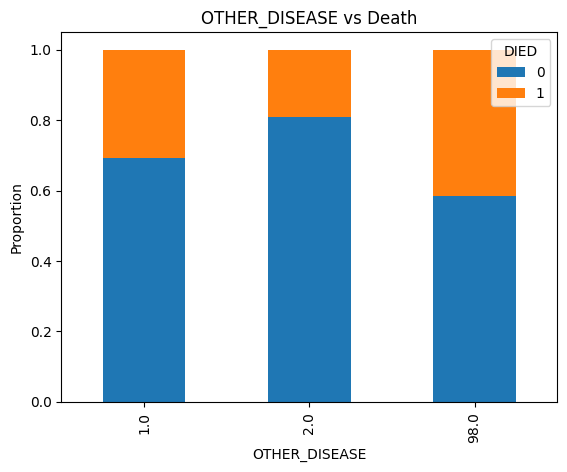

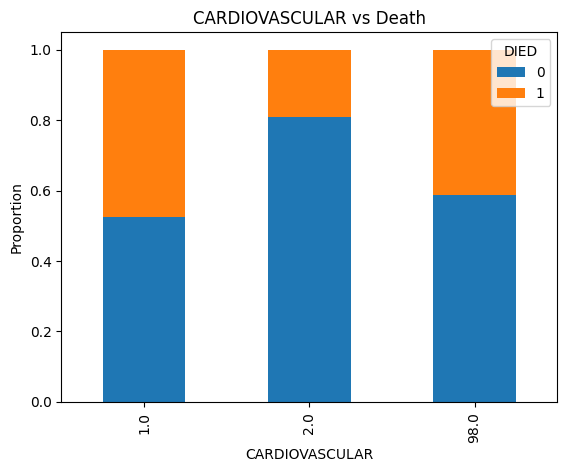

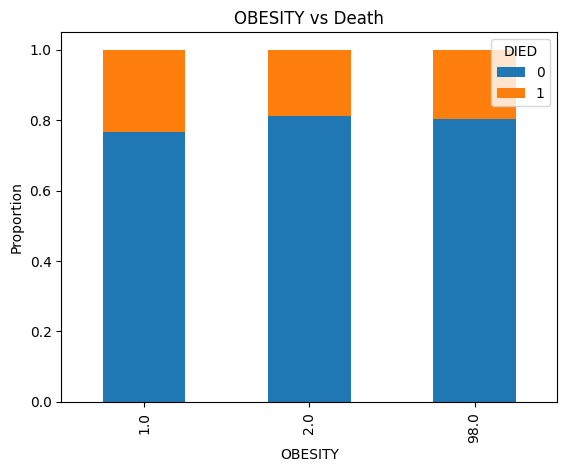

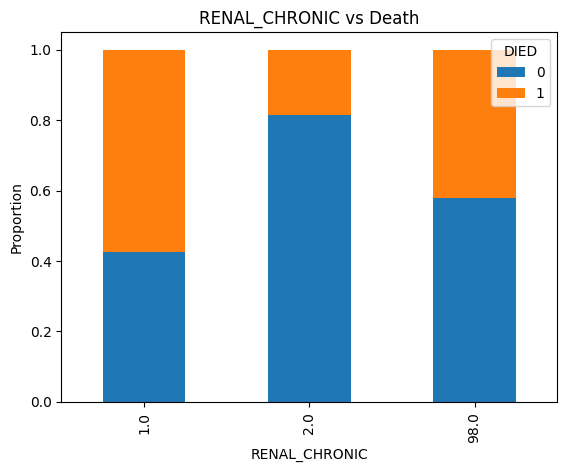

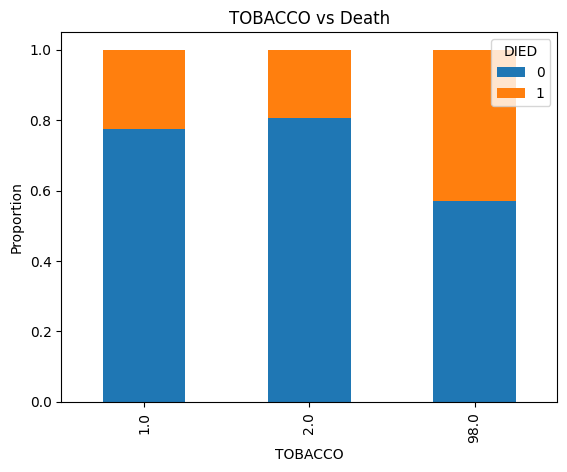

In [10]:
# Plot Death vs comorbidities
for col in comorbidities:
    ctab = pd.crosstab(df[col], df['DIED'], normalize='index')
    ctab.plot(kind='bar', stacked=True)
    plt.title(f"{col} vs Death")
    plt.ylabel("Proportion")
    plt.legend(title="DIED")
    plt.show()


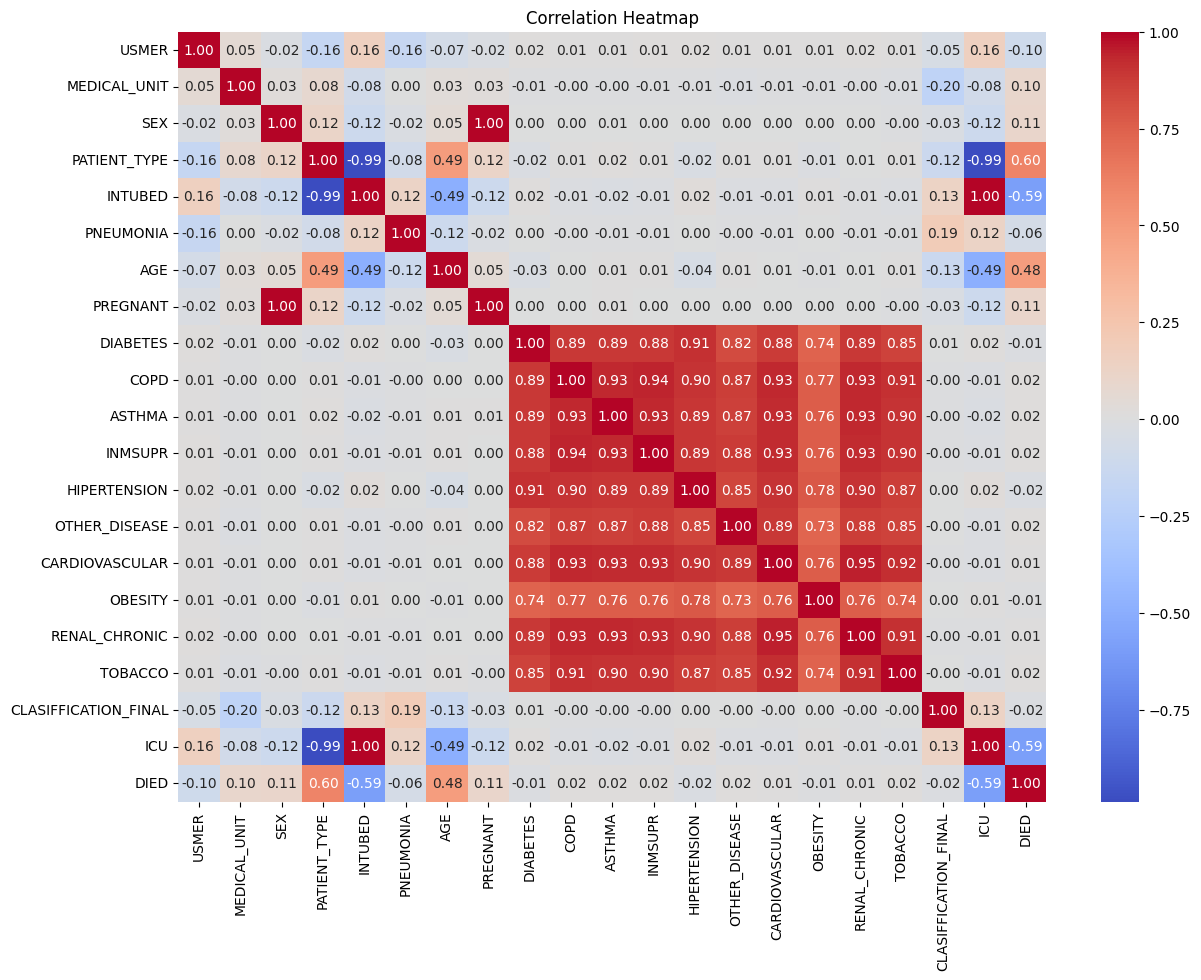

In [11]:
#Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


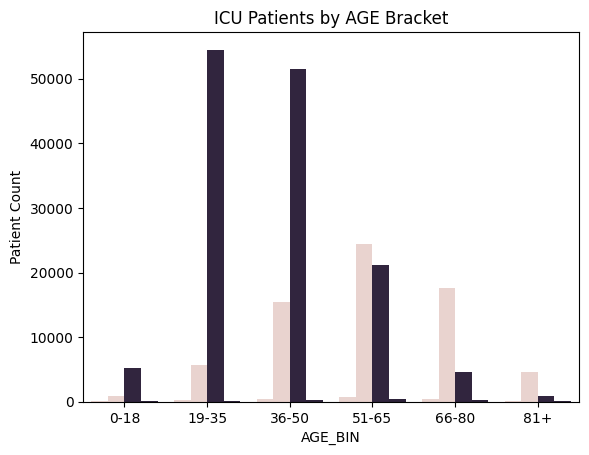

In [12]:
#ICU Patients by AGE Bracket
df['AGE_BIN']=pd.cut(df.AGE,bins=[0,18,35,50,65,80,100],labels=['0-18','19-35','36-50','51-65','66-80','81+'])
sns.countplot(data=df,x='AGE_BIN',hue='ICU', legend=False)
plt.title("ICU Patients by AGE Bracket")
plt.ylabel("Patient Count")
plt.show()

## Class Imbalance Check

Checking for class imbalance is a crucial step, especially in classification problems. Class imbalance occurs when the number of instances in one class significantly outweighs the number of instances in other classes.

**Why is it important?**

- **Biased Models:** Machine learning models trained on imbalanced datasets can become biased towards the majority class, leading to poor performance in predicting the minority class.
- **Misleading Accuracy:** Accuracy alone can be a misleading metric in the presence of class imbalance. A model that simply predicts the majority class for all instances might still show high accuracy, but it will fail to identify instances of the minority class.
- **Impact on Model Evaluation:** Evaluation metrics like precision, recall, F1-score, and AUC-ROC are more informative than accuracy when dealing with imbalanced datasets as they provide a better understanding of the model's performance on both majority and minority classes.

Addressing class imbalance is essential for building robust and effective classification models. Techniques like oversampling the minority class, undersampling the majority class, or using algorithms specifically designed for imbalanced data can be employed to mitigate this issue.

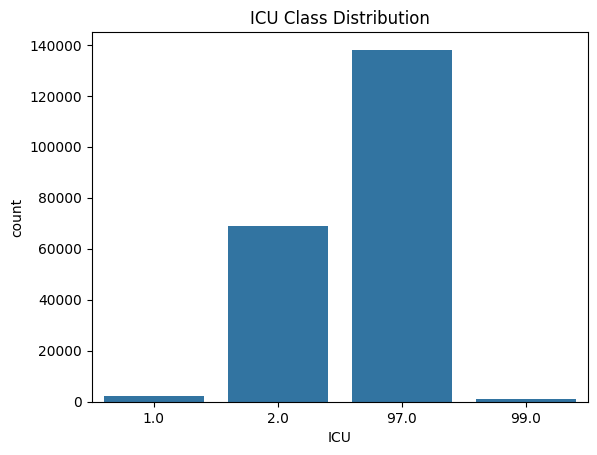

ICU
97.0    0.656773
2.0     0.327421
1.0     0.010061
99.0    0.005746
Name: proportion, dtype: float64


In [13]:
#Class Imbalance check
sns.countplot(x=y)
plt.title("ICU Class Distribution")
plt.show()
#Print Class Balance
print(y.value_counts(normalize=True))

## Feature Scaling

Feature scaling is a data preprocessing technique used to standardize the range of independent variables or features of the data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

**Why is it important?**

- **Impact on Distance-Based Algorithms:** Many machine learning algorithms, such as K-Nearest Neighbors (KNN), Support Vector Machines (SVMs) with radial basis function kernels, and K-Means clustering, rely on distance calculations to find similarities between data points. If features have different scales, features with larger values can disproportionately influence the distance, leading to biased results.
- **Gradient Descent Optimization:** Algorithms that use gradient descent optimization (like Linear Regression, Logistic Regression, Neural Networks) converge faster when features are on a similar scale. This is because the gradients are not dominated by features with larger scales, allowing the optimization algorithm to take more efficient steps towards the minimum.
- **Regularization Techniques:** Regularization methods like L1 and L2 regularization penalize large coefficients. If features are not scaled, features with larger values will tend to have smaller coefficients to minimize the penalty, which can be misleading. Scaling ensures that the penalty is applied more fairly across all features.
- **Tree-Based Algorithms:** Algorithms like Decision Trees and Random Forests are generally less sensitive to feature scaling because they make decisions based on the relative order of feature values rather than the absolute differences. However, even for these algorithms, scaling can sometimes have a minor positive impact on performance and can be necessary if using regularization techniques.

Common methods for feature scaling include:

- **Standardization (Z-score normalization):** Scales features to have a mean of 0 and a standard deviation of 1.
- **Normalization (Min-Max scaling):** Scales features to a fixed range, usually between 0 and 1.

Choosing the appropriate scaling method depends on the specific algorithm and the distribution of your data.

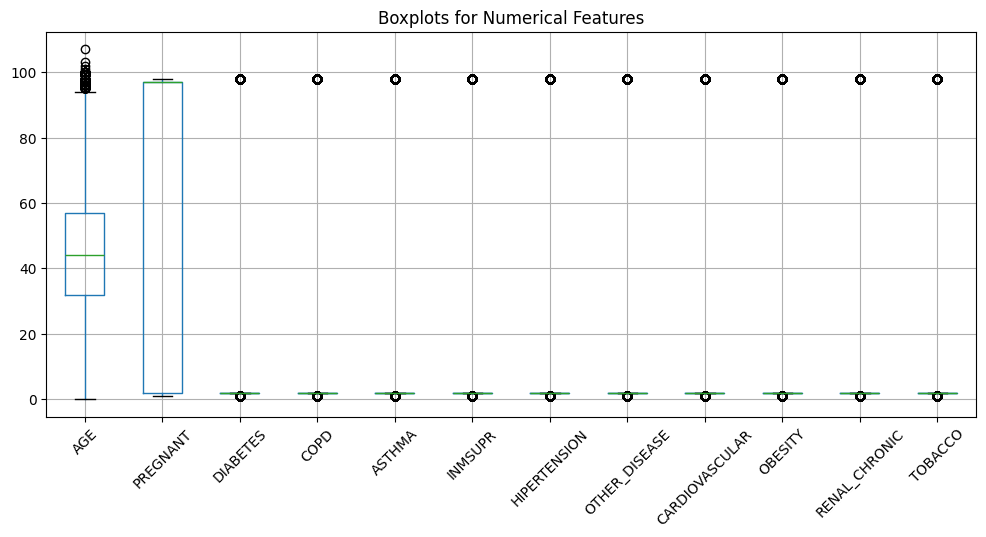

In [14]:
#Feature scaling check
df[["AGE"]+comorbidities].boxplot(figsize=(12,5))
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()

## Chi-Square and ANOVA Tests

**Chi-Square Test:**

The Chi-Square test is a statistical test used to determine if there is a significant association between two categorical variables. It compares the observed frequencies of categories in a contingency table with the expected frequencies if there were no association between the variables.

- **Use Case:**  To check if two categorical variables are independent or related (e.g., Is there a relationship between gender and ICU admission?).

**ANOVA (Analysis of Variance):**

ANOVA is a statistical test used to compare the means of three or more independent groups to determine if there is a statistically significant difference between them. It assesses the variation within each group compared to the variation between the groups.

- **Use Case:** To compare the means of a continuous variable across different categories of a categorical variable (e.g., Is there a significant difference in age among patients with different outcomes like Died, ICU, or neither?).

In [15]:
#Chi-Square or ANOVA Test
from scipy.stats import chi2_contingency
for col in comorbidities:
  table=pd.crosstab(df[col],df["ICU"])
  chi2,p,dof,expected=chi2_contingency(table)
  print(f"Chi-Square Test for {col}:")
  print(f"Chi-Square Statistic: {chi2}")
  print(f"P-Value: {p}")
  print(f"Degrees of Freedom: {dof}")
  print(f"Expected Frequencies:\n{expected}")
  print("\n")
#Small p-value(<0.05):Feature is significantly associated

Chi-Square Test for PREGNANT:
Chi-Square Statistic: 3123.4910910918484
P-Value: 0.0
Degrees of Freedom: 9
Expected Frequencies:
[[1.22738170e+01 3.99453260e+02 8.01262629e+02 7.01029359e+00]
 [9.94752626e+02 3.23743771e+04 6.49397090e+04 5.68161311e+02]
 [1.10663551e+03 3.60156227e+04 7.22436776e+04 6.32064159e+02]
 [1.33804726e+00 4.35469538e+01 8.73507620e+01 7.64236924e-01]]


Chi-Square Test for DIABETES:
Chi-Square Statistic: 17839.705274767875
P-Value: 0.0
Degrees of Freedom: 6
Expected Frequencies:
[[3.58415577e+02 1.16646900e+04 2.33981823e+04 2.04712065e+02]
 [1.75406930e+03 5.70864548e+04 1.14509625e+05 1.00185140e+03]
 [2.51512643e+00 8.18551763e+01 1.64193162e+02 1.43653557e+00]]


Chi-Square Test for COPD:
Chi-Square Statistic: 3152.6815321329263
P-Value: 0.0
Degrees of Freedom: 6
Expected Frequencies:
[[4.30388435e+01 1.40070578e+03 2.80967338e+03 2.45819967e+01]
 [2.06945609e+03 6.73507665e+04 1.35098790e+05 1.18198721e+03]
 [2.50506593e+00 8.15277556e+01 1.63536389e+02 

## Multicollinearity Check

Multicollinearity is a phenomenon that occurs when two or more predictor variables in a regression model are highly correlated. In simpler terms, it means that one predictor variable can be linearly predicted from the others with a high degree of accuracy.

**Why is it important to check for multicollinearity?**

- **Unreliable Coefficient Estimates:** Multicollinearity makes it difficult to interpret the individual impact of each predictor variable because their effects are intertwined. This can lead to unreliable and unstable coefficient estimates in your model.
- **Inflated Standard Errors:** High multicollinearity increases the standard errors of the regression coefficients. This can result in wider confidence intervals, making it harder to determine which predictors are statistically significant.
- **Difficulty in Model Interpretation:** It becomes challenging to understand the true relationship between each independent variable and the dependent variable when multicollinearity is present.

**How to detect multicollinearity:**

- **Correlation Matrix:** A simple way to check for multicollinearity is to examine the correlation matrix between your predictor variables. High correlation values (typically above 0.8 or 0.9) indicate potential multicollinearity.
- **Variance Inflation Factor (VIF):** VIF measures how much the variance of the estimated regression coefficient is increased due to multicollinearity. A high VIF value (often a threshold of 5 or 10 is used) suggests significant multicollinearity.
- **Eigenvalues and Condition Number:** Analyzing the eigenvalues of the correlation matrix or the condition number can also help detect multicollinearity.

Addressing multicollinearity might involve removing one of the highly correlated variables, combining them into a single variable, or using techniques like principal component analysis (PCA) or ridge regression.

In [16]:
#Multicolinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_vif = add_constant(X)
vif_data = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif = pd.DataFrame({'Features': ['const'] + list(X.columns), 'VIF': vif_data})
print(vif)

                Features          VIF
0                  const  2470.141340
1                  USMER     1.065359
2           MEDICAL_UNIT     1.059618
3                    SEX   386.544597
4           PATIENT_TYPE    42.399636
5                INTUBED    41.719245
6              PNEUMONIA     1.170006
7                    AGE     1.463267
8               PREGNANT   386.497714
9               DIABETES     7.419331
10                  COPD    13.484622
11                ASTHMA    12.088357
12               INMSUPR    12.312278
13          HIPERTENSION     9.260102
14         OTHER_DISEASE     5.507392
15        CARDIOVASCULAR    14.459623
16               OBESITY     2.751573
17         RENAL_CHRONIC    13.930967
18               TOBACCO     7.971955
19  CLASIFFICATION_FINAL     1.111160
20                  DIED     1.719218


<Axes: >

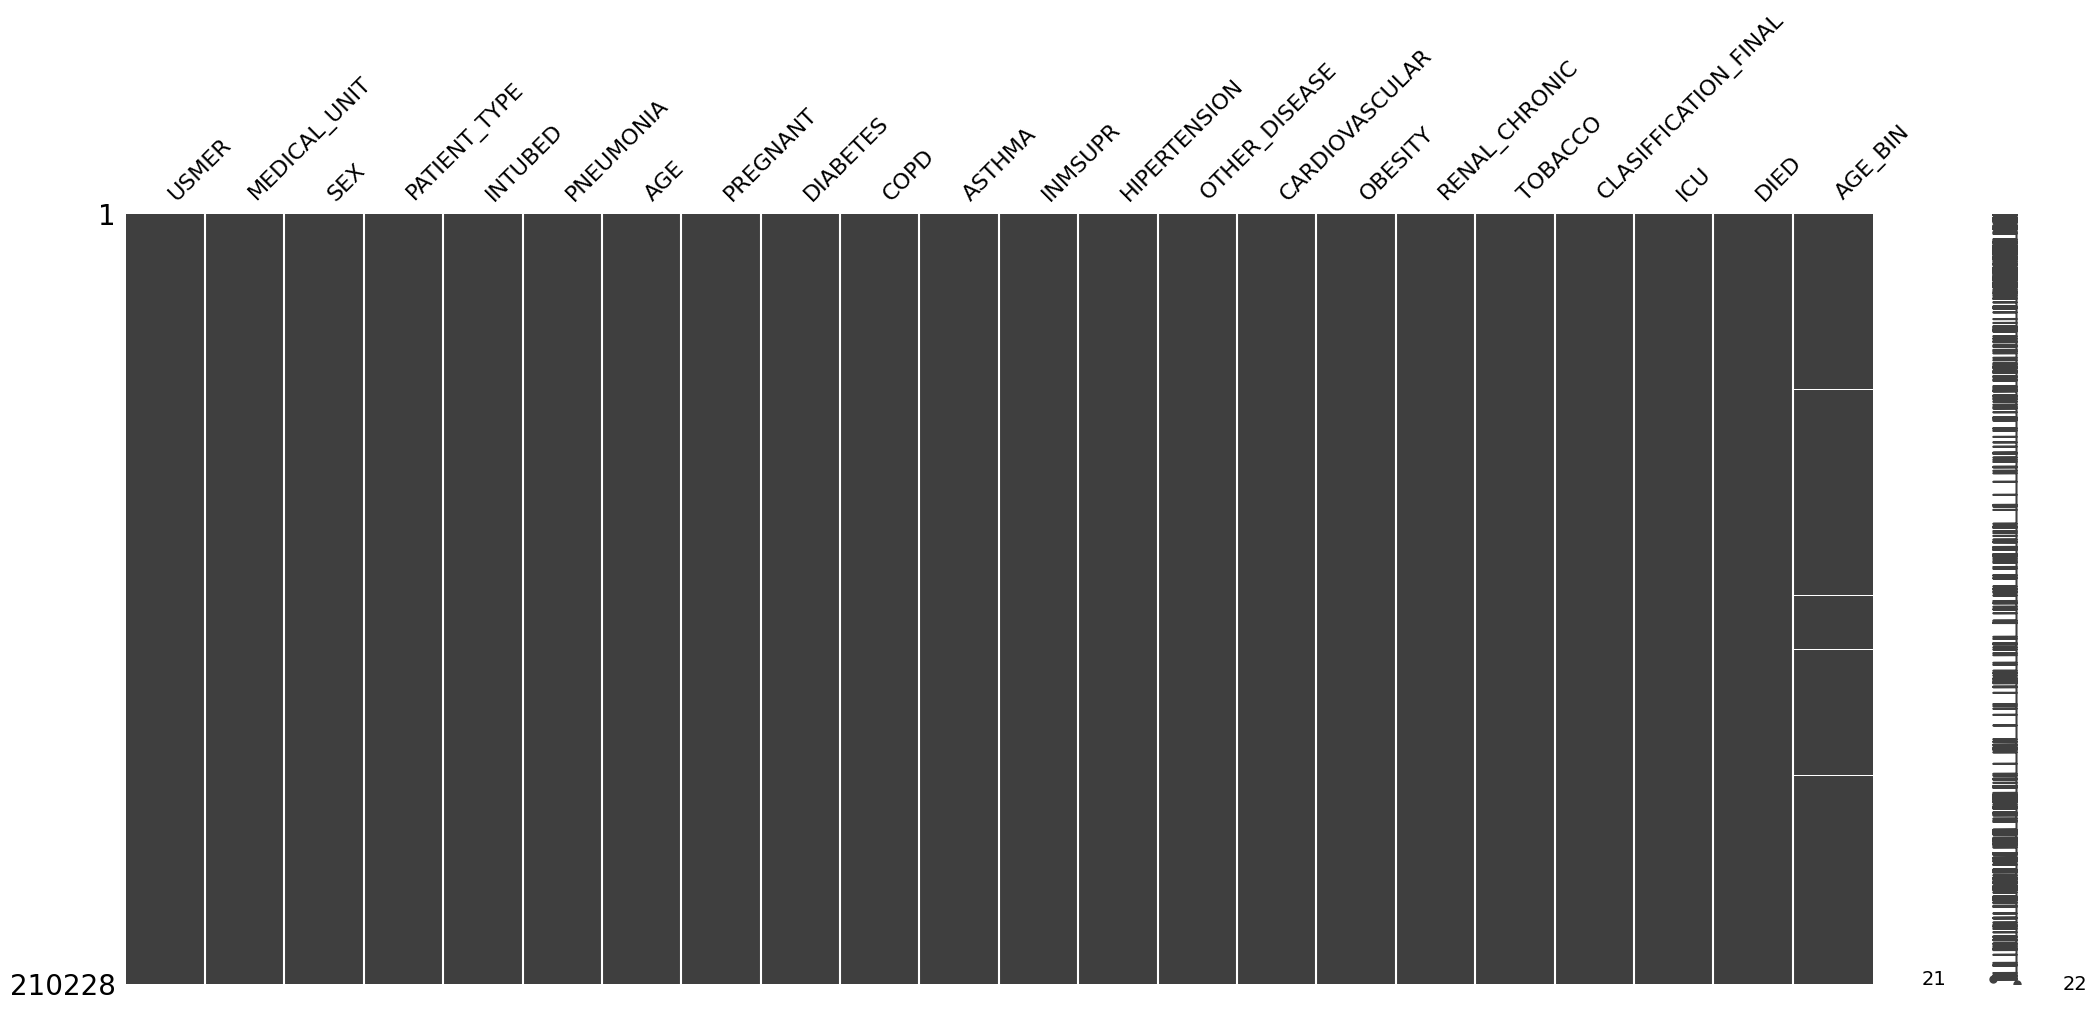

In [17]:
#Missing Value Heatmap
import missingno as msno
msno.matrix(df)

## Logistic Regression

Logistic Regression is a statistical model used for binary classification problems. Despite the name "regression," it's primarily a classification algorithm. It predicts the probability that a given input point belongs to a particular class.

Here's how it generally works:

1.  **Linear Combination:** It calculates a linear combination of the input features and their corresponding weights (coefficients), similar to linear regression.
2.  **Sigmoid Function:** This linear combination is then passed through a sigmoid (or logistic) function. The sigmoid function squashes the output to a value between 0 and 1, which can be interpreted as a probability.
3.  **Classification:** A threshold (commonly 0.5) is applied to this probability. If the probability is above the threshold, the instance is classified as belonging to the positive class; otherwise, it's classified as the negative class.

**Key points about Logistic Regression:**

-   It's a simple yet powerful algorithm, especially for linearly separable data.
-   The coefficients can be interpreted as the change in the log-odds of the outcome for a one-unit change in the predictor variable.
-   It's prone to issues with multicollinearity in the input features.
-   It assumes a linear relationship between the independent variables and the log-odds of the dependent variable.

Logistic Regression is a good starting point for binary classification tasks and provides a probabilistic interpretation of the predictions.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     41623
           1       0.00      0.00      0.00       423

    accuracy                           0.99     42046
   macro avg       0.49      0.50      0.50     42046
weighted avg       0.98      0.99      0.98     42046



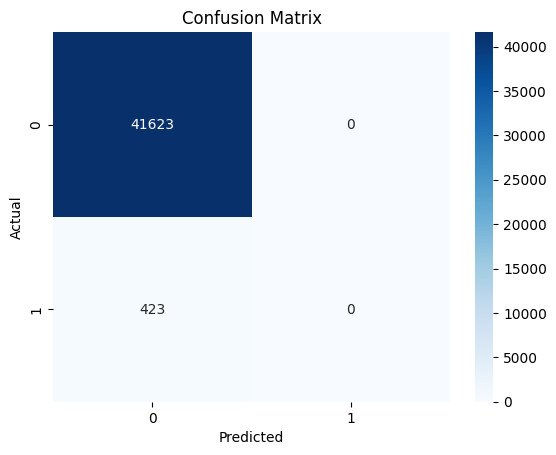

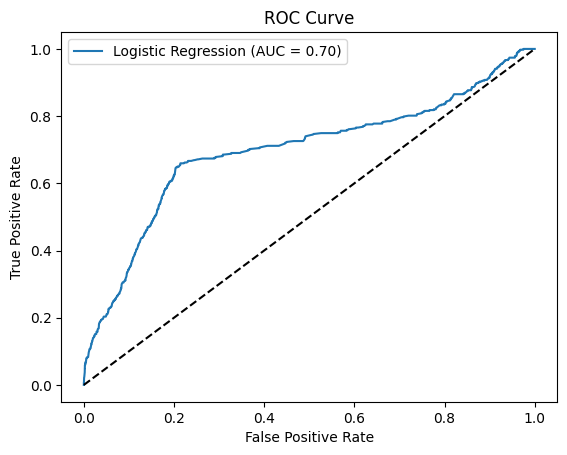

In [18]:
#Logistic Regression Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Define features and target
features = ['AGE', 'DIABETES', 'OBESITY', 'COPD', 'ASTHMA', 'HIPERTENSION',
            'CARDIOVASCULAR', 'RENAL_CHRONIC', 'TOBACCO', 'PNEUMONIA', 'INMSUPR']
target = 'ICU'

X = df[features]
# Create a binary target for ICU: 1 if ICU (original 1.0), 0 otherwise
df['ICU_binary'] = (df[target] == 1.0).astype(int)
y = df['ICU_binary']

# Drop missing values (if any)
X = X.dropna()
y = y[X.index]  # align with X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1] # Probability of the positive class (ICU)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Random Forest Classifier

The Random Forest Classifier is a powerful and popular supervised machine learning algorithm used for both classification and regression tasks. It's an **ensemble learning method** that operates by constructing a multitude of decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Here's a breakdown of how it works:

1.  **Bagging (Bootstrap Aggregating):** The algorithm creates multiple subsets of the training data by randomly sampling with replacement. Each subset is used to train a separate decision tree.
2.  **Random Feature Subsetting:** At each node of a decision tree, instead of considering all features, the algorithm only considers a random subset of features. This randomness helps to decorrelate the trees.
3.  **Voting (Classification):** For classification, the final prediction is made by taking a vote among all the individual decision trees. The class that receives the most votes is the predicted class.

**Key advantages of using Random Forest:**

-   **Reduces Overfitting:** By averaging the predictions of multiple trees and using random subsets of data and features, Random Forest is less prone to overfitting compared to a single decision tree.
-   **Handles Non-linearity:** It can capture complex non-linear relationships between features and the target variable.
-   **Feature Importance:** It can provide insights into the importance of different features in making predictions.
-   **Robust to Outliers:** It's generally less sensitive to outliers in the data.

Random Forest is a versatile algorithm that often provides high accuracy and is a good choice for many classification problems.

📋 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     41623
           1       0.06      0.00      0.01       423

    accuracy                           0.99     42046
   macro avg       0.52      0.50      0.50     42046
weighted avg       0.98      0.99      0.98     42046



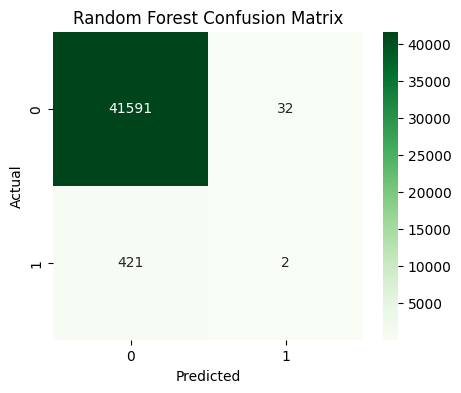

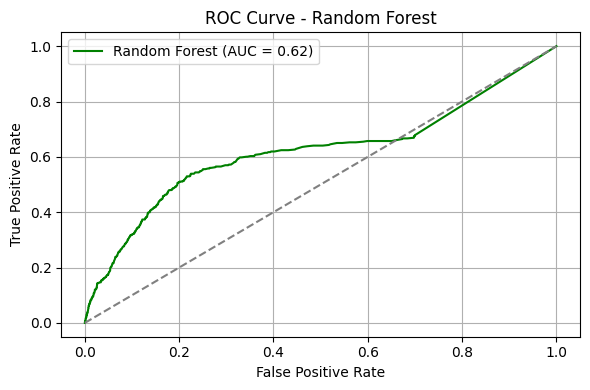

In [19]:
# 📦 Import
from sklearn.ensemble import RandomForestClassifier

# 🔁 Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🔍 Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# 📋 Classification Report
print("📋 Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# 📉 Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🔵 ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## XGBoost (Extreme Gradient Boosting)

XGBoost is a popular and highly efficient open-source library that provides a gradient boosting framework. It's an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. XGBoost has gained popularity due to its strong performance in various machine learning tasks, particularly in structured data competitions.

Here are some key aspects of XGBoost:

- **Gradient Boosting:** XGBoost is based on the concept of gradient boosting, where new models are created to predict the residuals or errors of previous models, and then added together to make the final prediction.
- **Decision Trees:** Like Random Forests, XGBoost typically uses decision trees as the base learners.
- **Optimization:** XGBoost includes several optimizations to improve performance and speed, such as:
    - **Regularization:** L1 and L2 regularization are included to prevent overfitting.
    - **Handling Missing Values:** XGBoost has a built-in way to handle missing values.
    - **Parallel Processing:** It supports parallel processing to speed up training.
    - **Tree Pruning:** It uses a more sophisticated tree pruning algorithm.
- **Flexibility:** It supports various objective functions and evaluation metrics, making it suitable for a wide range of tasks.

**Key advantages of using XGBoost:**

- **High Performance:** XGBoost is known for its speed and accuracy.
- **Regularization:** The built-in regularization helps to reduce overfitting.
- **Handling Missing Data:** It can handle missing values without requiring imputation.
- **Flexibility:** It can be used for classification, regression, ranking, and other tasks.

XGBoost is a powerful tool that often achieves state-of-the-art performance and is widely used in industry and data science competitions.

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [05:52:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📋 XGBoost Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     41623
           1       0.14      0.00      0.00       423

    accuracy                           0.99     42046
   macro avg       0.57      0.50      0.50     42046
weighted avg       0.98      0.99      0.98     42046



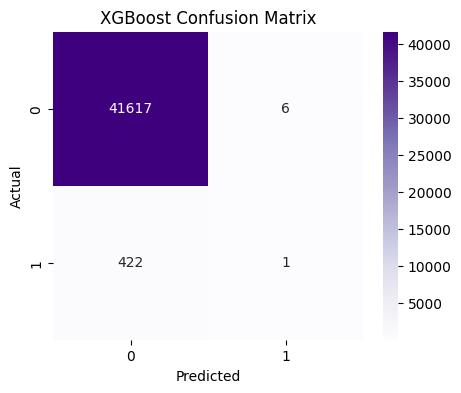

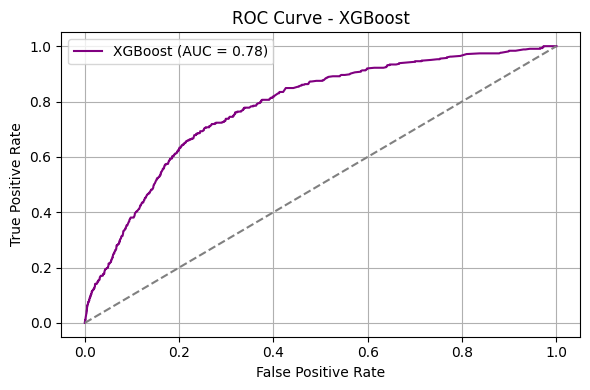

In [20]:
# 📦 Import
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve

# ⚠️ Optional: Install XGBoost in case it's missing
# !pip install xgboost

# 🔁 Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# 🔍 Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# 📋 Classification Report
print("📋 XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

# 📉 Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🔵 ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})", color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


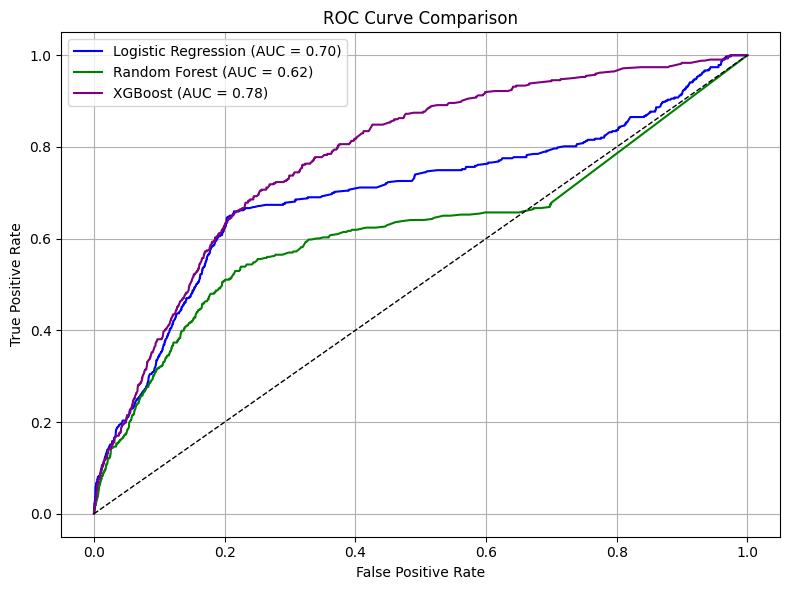

In [21]:
# ⚖️ Calculate FPR, TPR for all models
# Ensure y_prob_lr is defined (re-predict if necessary, though ideally from the LR cell)
if 'y_prob_lr' not in locals():
    # This part is added to make the cell runnable independently if needed
    # Ideally, the LR model cell should be run before this one
    y_prob_lr = logreg.predict_proba(X_test)[:, 1]


fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# 🔢 AUC Scores
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# 📉 Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})", color='purple')

# Reference Line
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
#Side-by-side comparison
model_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "AUC Score": [auc_lr, auc_rf, auc_xgb]
}).sort_values(by="AUC Score", ascending=False)

display(model_results)


Model  AUC Score
2              XGBoost   0.779713
0  Logistic Regression   0.697121
1        Random Forest   0.621260

/tmp/ipython-input-2683225733.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feat_imp.values, y=rf_feat_imp.index, palette='viridis')
/tmp/ipython-input-2683225733.py:12: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


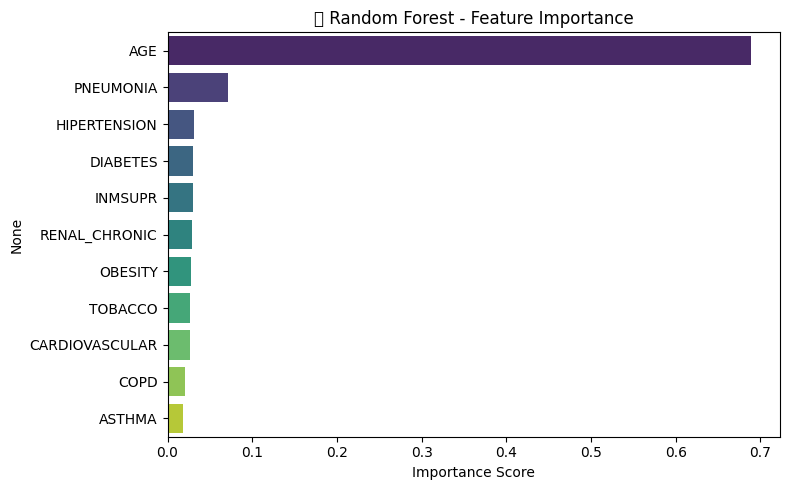

In [23]:
# 🎯 Feature Names
feature_names = X_train.columns

# 🔥 Random Forest Feature Importance
importances_rf = rf.feature_importances_
rf_feat_imp = pd.Series(importances_rf, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=rf_feat_imp.values, y=rf_feat_imp.index, palette='viridis')
plt.title("🔍 Random Forest - Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


/tmp/ipython-input-63335201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_feat_imp.values, y=xgb_feat_imp.index, palette='magma')
/tmp/ipython-input-63335201.py:9: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


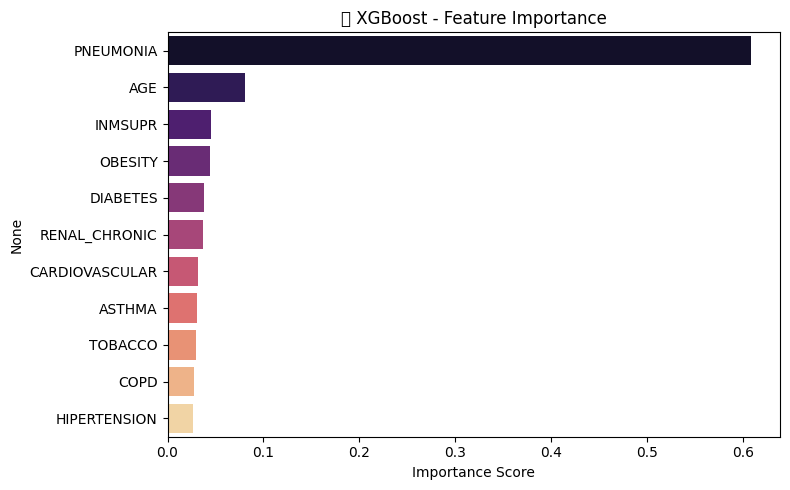

In [24]:
# 🔥 XGBoost Feature Importance
importances_xgb = xgb.feature_importances_
xgb_feat_imp = pd.Series(importances_xgb, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=xgb_feat_imp.values, y=xgb_feat_imp.index, palette='magma')
plt.title("🔍 XGBoost - Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## SHAP (SHapley Additive exPlanations)

SHAP (SHapley Additive exPlanations) is a game theory approach used to explain the output of any machine learning model. It connects optimal credit allocation with local explanations by computing Shapley values from coalitional game theory.

**Key concepts:**

-   **Shapley Values:** These values represent the contribution of each feature to the prediction for a specific instance, compared to the average prediction. They are calculated by considering all possible combinations of features and how adding a feature impacts the prediction.
-   **Local Interpretability:** SHAP provides explanations for individual predictions, allowing you to understand why a specific patient was predicted to require ICU, for instance.
-   **Global Interpretability:** By aggregating Shapley values across many instances, you can also gain insights into the overall importance of features and how they influence the model's output on average.
-   **Model-Agnostic (with some explainers):** Some SHAP explainers (like KernelExplainer) can be used with any machine learning model, while others (like TreeExplainer) are optimized for specific model types (like tree-based models).

**Why is SHAP important?**

-   **Transparency:** It helps to make complex "black-box" models more transparent by explaining their predictions.
-   **Debugging:** It can help identify potential issues with the model or data, such as unexpected feature influences.
-   **Trust:** Understanding how a model arrives at its predictions can increase trust in its results, which is particularly important in critical domains like healthcare.
-   **Feature Selection:** SHAP values can be used to identify the most important features for a model.

SHAP is a powerful tool for gaining insights into the behavior of your machine learning models and explaining their predictions in a clear and interpretable way.

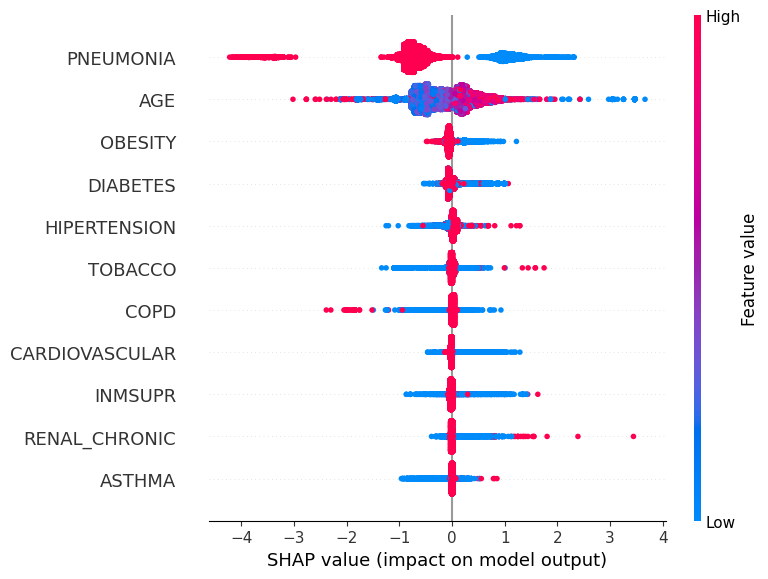

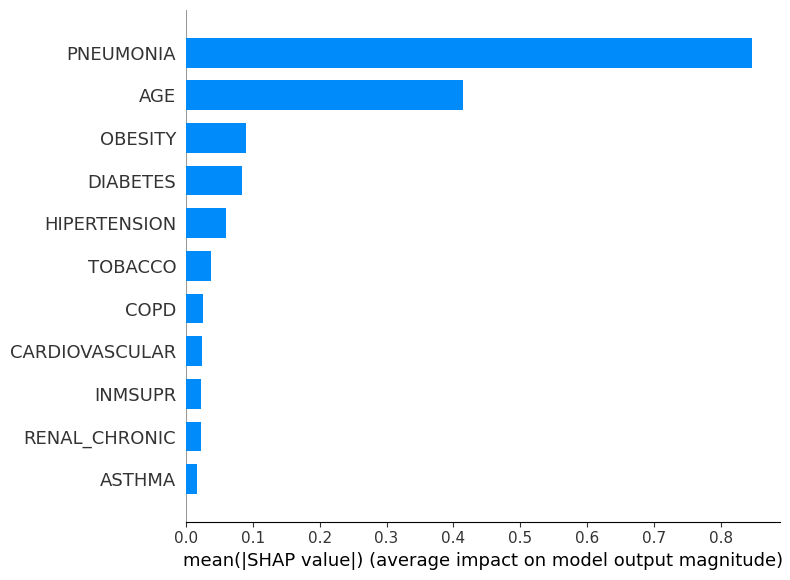

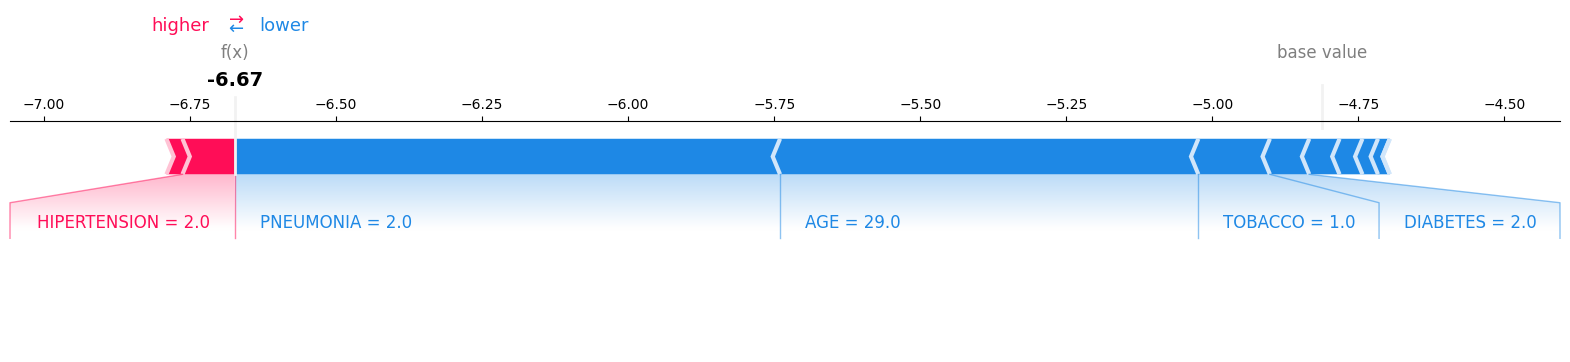

In [25]:
!pip install shap --quiet

import shap
shap.initjs()  # Initialize JavaScript visualizations
# Use TreeExplainer for tree-based models like XGBoost
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
# This shows which features are most important and their effect direction
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
idx = 0
shap.force_plot(explainer.expected_value, shap_values[idx], X_test.iloc[idx], matplotlib=True)


Total misclassified samples: 428
Top 5 misclassified original indices: [87698, 22971, 198612, 162862, 27506]
🔍 Misclassified Patient 1 — Original Index: 87698, iLOC Index: 12296


/tmp/ipython-input-3605891398.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_df['confidence'] = misclassified_df[['prob_class_0', 'prob_class_1']].max(axis=1)


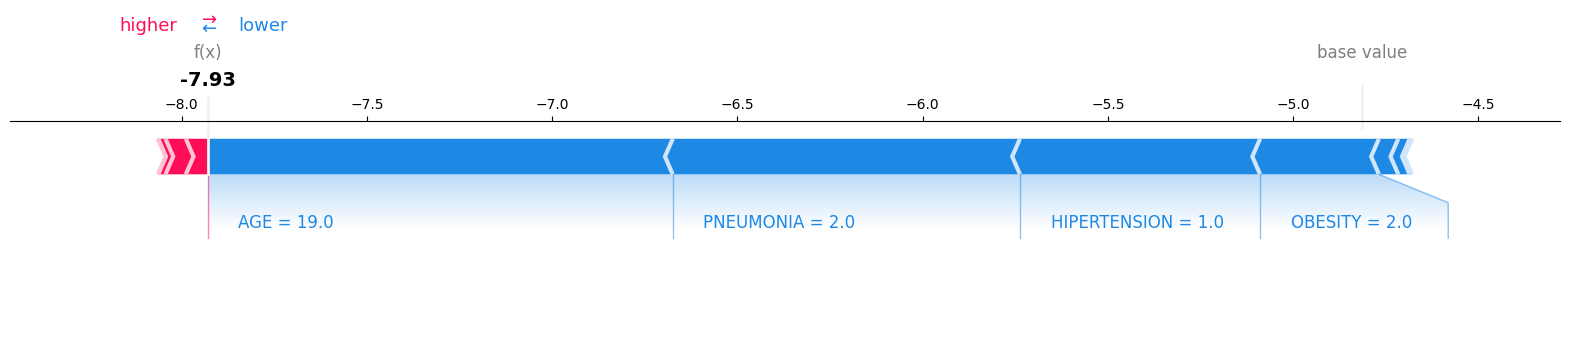

🔍 Misclassified Patient 2 — Original Index: 22971, iLOC Index: 3619


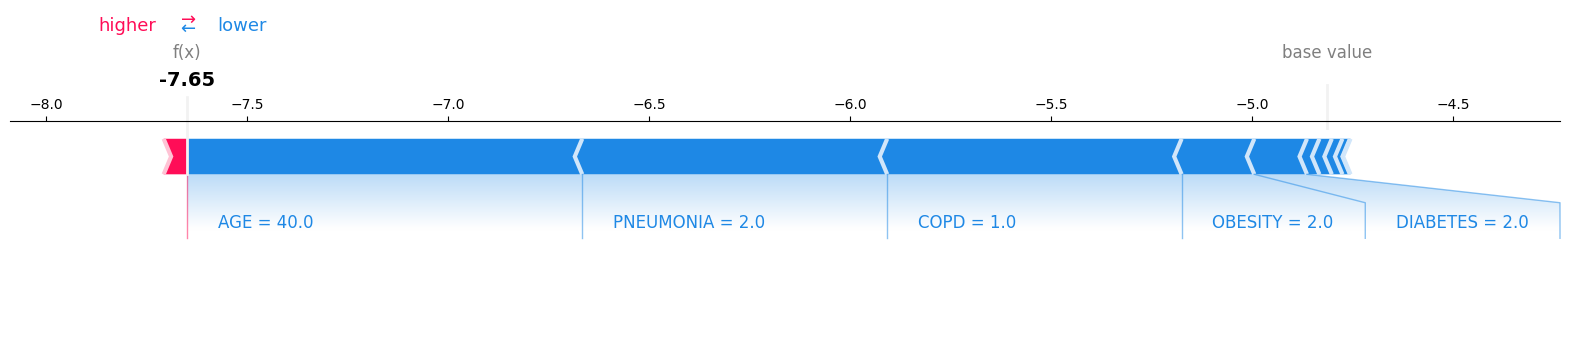

🔍 Misclassified Patient 3 — Original Index: 198612, iLOC Index: 17502


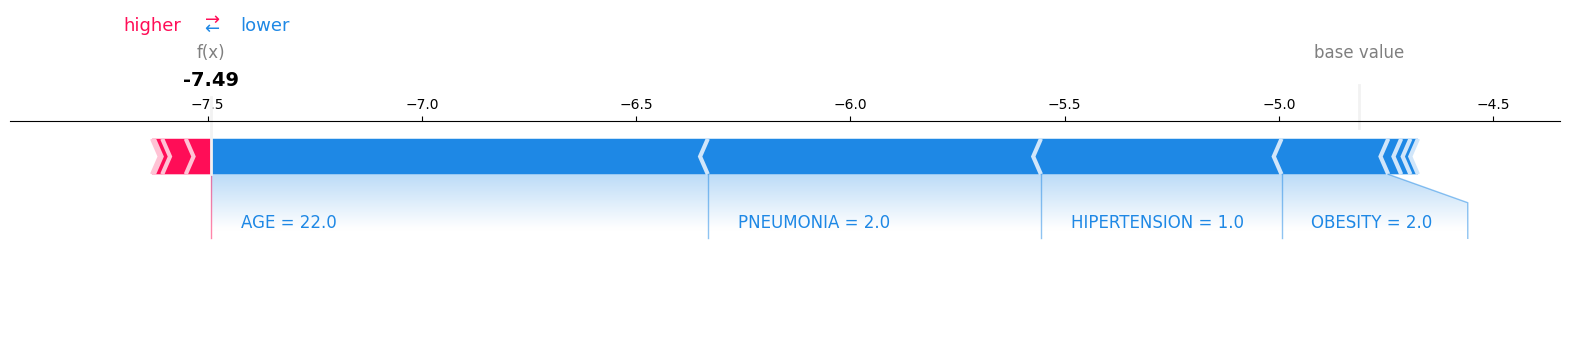

🔍 Misclassified Patient 4 — Original Index: 162862, iLOC Index: 17331


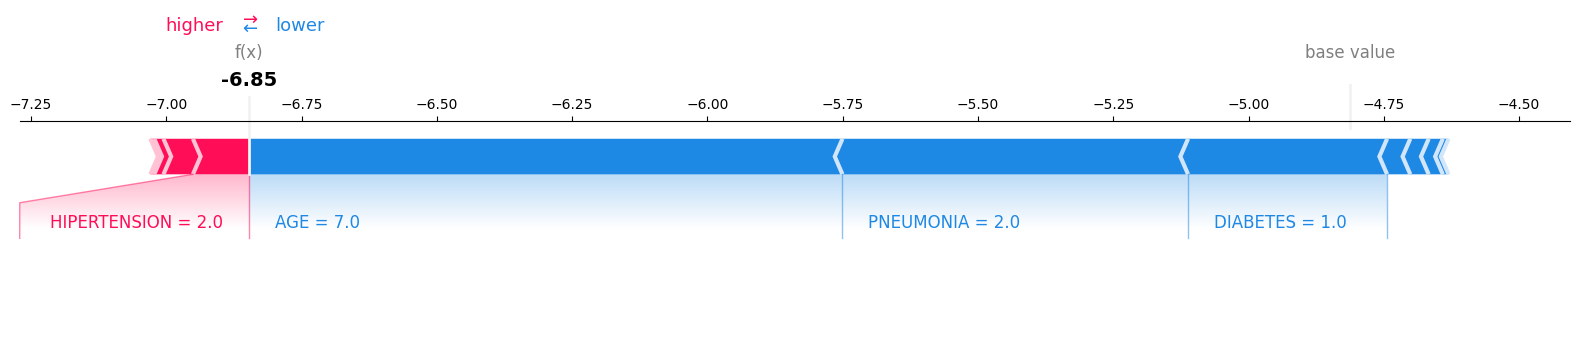

🔍 Misclassified Patient 5 — Original Index: 27506, iLOC Index: 9114


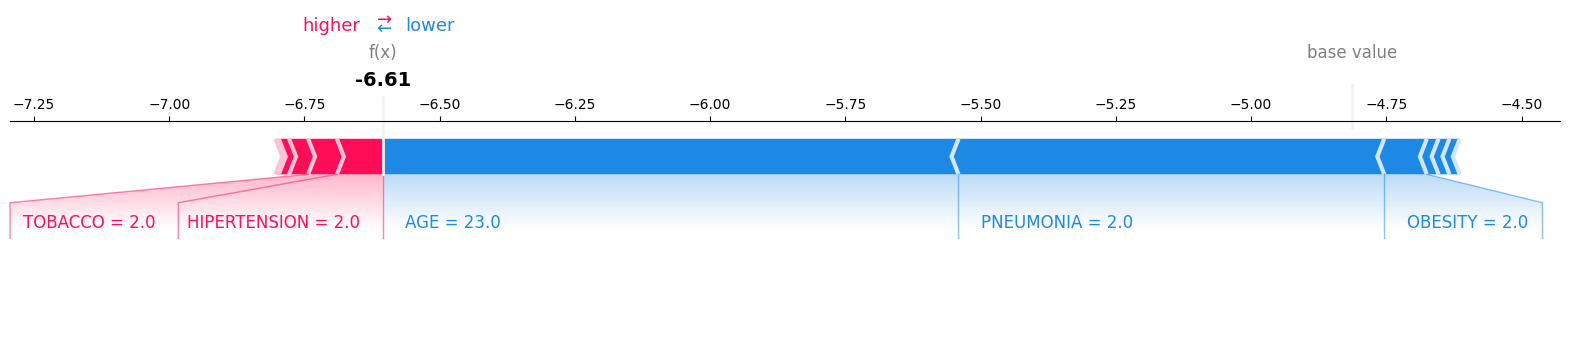

In [26]:
#Highlight Missclassified Patients using SHAP
# 🎯 Predictions
y_pred = xgb.predict(X_test)

# 🧪 Find Misclassified Samples
misclassified_indices = X_test[(y_pred != y_test)].index
print(f"Total misclassified samples: {len(misclassified_indices)}")
# 🧠 Get prediction probabilities
y_proba = xgb.predict_proba(X_test)

# 📊 Create DataFrame for analysis
proba_df = pd.DataFrame({
    'actual': y_test.values,
    'predicted': y_pred,
    'prob_class_1': y_proba[:, 1],
    'prob_class_0': y_proba[:, 0]
}, index=X_test.index)

# 🛑 Misclassified with high confidence (>0.85 probability)
misclassified_df = proba_df[(proba_df['actual'] != proba_df['predicted'])]
misclassified_df['confidence'] = misclassified_df[['prob_class_0', 'prob_class_1']].max(axis=1)


# Sort by confidence descending
misclassified_df = misclassified_df.sort_values(by='confidence', ascending=False)
top_misclassified_indices_original = misclassified_df.head(5).index

print(f"Top 5 misclassified original indices: {list(top_misclassified_indices_original)}")

# Get the integer locations in X_test for the top misclassified original indices
top_misclassified_iloc = [X_test.index.get_loc(i) for i in top_misclassified_indices_original]

for i, original_idx in enumerate(top_misclassified_indices_original):
    iloc_idx = top_misclassified_iloc[i] # Get the corresponding integer location
    print(f"🔍 Misclassified Patient {i+1} — Original Index: {original_idx}, iLOC Index: {iloc_idx}")
    shap.force_plot(
        explainer.expected_value,
        shap_values[iloc_idx], # Use iLOC index for shap_values
        X_test.loc[original_idx], # Use original index with .loc for X_test
        matplotlib=True
    )

In [27]:
#Sequential SHAP Force Plots for Misclassified Patients

# Get the integer locations in X_test for the top misclassified original indices
top_misclassified_iloc = [X_test.index.get_loc(i) for i in top_misclassified_indices_original]
top_indices_iloc = top_misclassified_iloc[:6] # Take up to 6 indices

print(f"Generating sequential SHAP force plots for the top {len(top_indices_iloc)} misclassified patients:")

for i, iloc_idx in enumerate(top_indices_iloc):
    # Get the original index from the test set's index
    original_idx = X_test.iloc[iloc_idx].name
    print(f"\n🔍 SHAP Force Plot for Patient — Original Index: {original_idx}")
    shap.force_plot(
        base_value=explainer.expected_value,
        shap_values=shap_values[iloc_idx],
        features=X_test.iloc[iloc_idx],
        matplotlib=False # Generate HTML plot
    )

Generating sequential SHAP force plots for the top 5 misclassified patients:

🔍 SHAP Force Plot for Patient — Original Index: 87698

🔍 SHAP Force Plot for Patient — Original Index: 22971

🔍 SHAP Force Plot for Patient — Original Index: 198612

🔍 SHAP Force Plot for Patient — Original Index: 162862

🔍 SHAP Force Plot for Patient — Original Index: 27506


In [28]:
#TRACK-2:Time_Series_Forecasting
import pandas as pd

# Load data again with DATE_DIED
df = pd.read_csv('/content/Covid Data.csv')  # or your existing variable
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')
df_deaths=df[df.DATE_DIED.notna()]
#Only real deaths
df_deaths

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  \
0            2             1    1             1 2020-03-05       97   
1            2             1    2             1 2020-03-06       97   
2            2             1    2             2 2020-09-06        1   
3            2             1    1             1 2020-12-06       97   
152          1             2    2             2 2020-05-04        1   
...        ...           ...  ...           ...        ...      ...   
1047629      1            13    1             2 2020-08-07        2   
1047630      1            13    2             1 2020-09-07       97   
1047631      1            13    2             2 2020-10-07        2   
1047632      1            13    1             1 2020-10-07       97   
1047633      1            13    2             2 2020-12-07        2   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2   
1                1   72        97         2  ...       2        2   
2                2   55        97         1  ...       2        2   
3                2   53         2         2  ...       2        2   
152              1   14        97         2  ...       2        2   
...            ...  ...       ...       ...  ...     ...      ...   
1047629          1   85         2         1  ...       2        2   
1047630          1   70        97         1  ...       2        2   
1047631          1   65        97         2  ...       2        2   
1047632          1   63         2         2  ...       2        2   
1047633          1   57        97         1  ...       2        2   

         HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  \
0                   1              2               2        2              2   
1                   1              2               2        1              1   
2                   2              2               2        2              2   
3                   2              2               2        2              2   
152                 2              2               2        2              2   
...               ...            ...             ...      ...            ...   
1047629             1              2               2        1              2   
1047630             2              2               2        2              2   
1047631             2              2               2        2              2   
1047632             1              2               2        2              2   
1047633             1              2               2        1              2   

         TOBACCO  CLASIFFICATION_FINAL  ICU  
0              2                     3   97  
1              2                     5   97  
2              2                     3    2  
3              2                     7   97  
152            2                     7    2  
...          ...                   ...  ...  
1047629        2                     3    2  
1047630        1                     3   97  
1047631        2                     3    2  
1047632        2                     3   97  
1047633        1                     3    2  

[30492 rows x 21 columns]

Head of death_series:
DATE_DIED
2020-01-02     13.0
2020-01-03     11.0
2020-01-04     56.0
2020-01-05    555.0
2020-01-06    829.0
Freq: D, dtype: float64


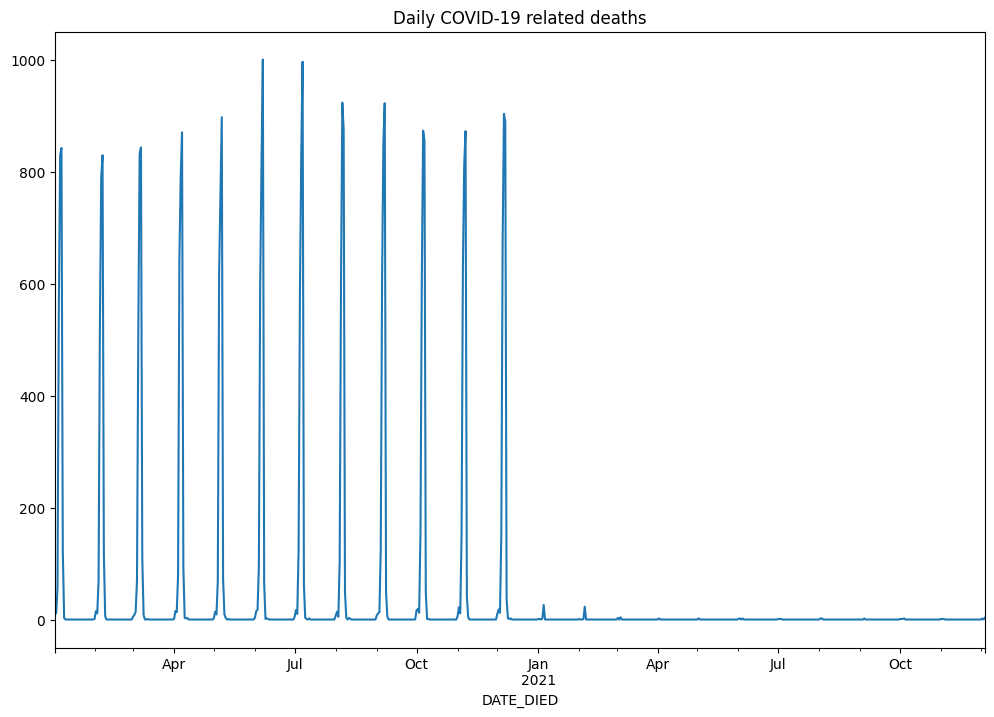

In [29]:
#Group by date to create the time series
#Count deaths per day
death_series=df_deaths.groupby('DATE_DIED').size()
#Fill missing dates with 0
death_series=death_series.asfreq('D').fillna(0)

print("Head of death_series:")
print(death_series.head())

#Plot to visualize
plt.close('all') # Close any previous plot figures
death_series.plot(title="Daily COVID-19 related deaths",figsize=(12,8))
plt.show()

In [30]:
#Renaming the columns for prophet
# Use the death_series created in the previous cell
df_ts = death_series.reset_index()
df_ts.columns = ['ds', 'y'] # Rename the columns to 'ds' and 'y'
df_ts.head()

ds      y
0 2020-01-02   13.0
1 2020-01-03   11.0
2 2020-01-04   56.0
3 2020-01-05  555.0
4 2020-01-06  829.0

## Time Series Forecasting with Prophet

Prophet is a forecasting procedure developed by Facebook's core Data Science team. It is designed for analyzing time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

**Key features of Prophet:**

- **Decomposition:** Prophet decomposes time series into trend, seasonality, and holidays.
- **Seasonality:** It can model yearly, weekly, and daily seasonality.
- **Holidays:** It allows you to include a custom list of important holidays that might have an impact on the time series.
- **Robustness:** It is designed to handle missing data and outliers effectively.
- **Interpretability:** The model provides easily interpretable components (trend, seasonality, holidays) which can help understand the drivers of the time series.

Prophet is particularly useful for business time series with irregular patterns, but it can be applied to a wide range of time series data. It works best with time series that have at least a few months of historical data and preferably a year or more to capture yearly seasonality.

In [31]:
#Installing Prophet
!pip install prophet --quiet
from prophet import Prophet

In [32]:
#Create and fit model
model = Prophet(daily_seasonality=True)
model.fit(df_ts)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxho75uq_/4gsub4f4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxho75uq_/nsqc2m0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58902', 'data', 'file=/tmp/tmpxho75uq_/4gsub4f4.json', 'init=/tmp/tmpxho75uq_/nsqc2m0r.json', 'output', 'file=/tmp/tmpxho75uq_/prophet_model6lbi34ib/prophet_model-20250817055252.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:52:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:52:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
#Generate future dates
future = model.make_future_dataframe(periods=30)
#Forecast
forecast = model.predict(future)
#Show Forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
728 2021-12-30 -29.258363 -253.114547  179.922353
729 2021-12-31 -25.454959 -240.631202  173.299498
730 2022-01-01 -26.493468 -249.789822  193.432545
731 2022-01-02 -20.450499 -239.043905  192.370605
732 2022-01-03 -18.789193 -236.008199  214.453618

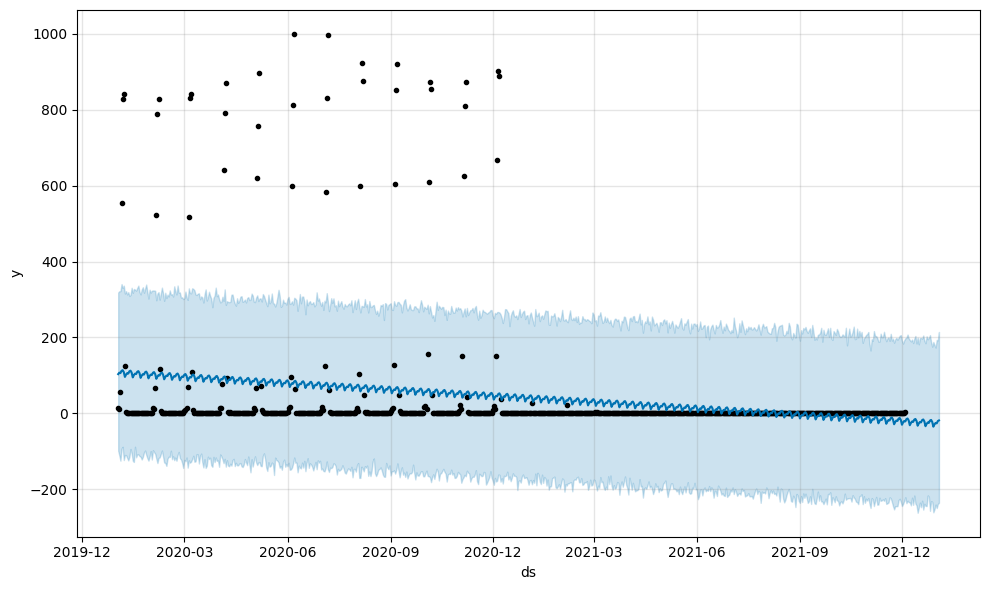

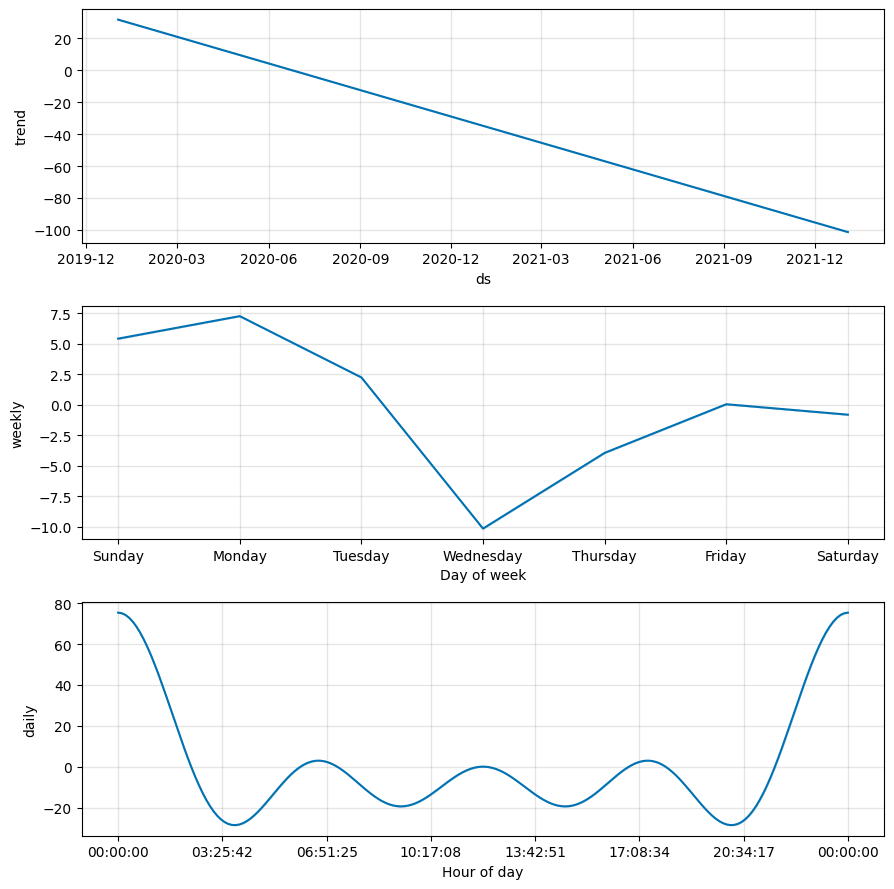

In [34]:
#Plot the forecast
model.plot(forecast)
plt.show()

#Plot the forecast components
model.plot_components(forecast)
plt.show()

In [35]:
#Evaluating Forecast Efficiency
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split 80% train, 20% test
train = df_ts[:-30]
test = df_ts[-30:]

# Fit model on training set
model = Prophet(daily_seasonality=True)
model.fit(train)

# Predict for test dates
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Compare predictions with actual
forecast_test = forecast[-30:][['ds', 'yhat']].copy()
forecast_test['actual'] = test['y'].values

# Accuracy metrics
mae = mean_absolute_error(forecast_test['actual'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(forecast_test['actual'], forecast_test['yhat']))
mape = np.mean(np.abs((forecast_test['actual'] - forecast_test['yhat']) / forecast_test['actual'])) * 100

print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxho75uq_/pzwegzhb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxho75uq_/lxuu2ua0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94555', 'data', 'file=/tmp/tmpxho75uq_/pzwegzhb.json', 'init=/tmp/tmpxho75uq_/lxuu2ua0.json', 'output', 'file=/tmp/tmpxho75uq_/prophet_modelyl72ga3c/prophet_model-20250817055253.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:52:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:52:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 22.06 | RMSE: 22.88 | MAPE: inf%


## ARIMA (AutoRegressive Integrated Moving Average)

ARIMA is a popular statistical model for time series forecasting. It's a class of models that can capture a suite of different standard temporal structures in time series data.

The ARIMA model is defined by three components: (p, d, q):

-   **AR (AutoRegressive):** This component models the relationship between the current observation and a number of lagged observations. The `p` parameter is the order of the AR part.
-   **I (Integrated):** This component involves differencing the raw observations to make the time series stationary. The `d` parameter is the degree of differencing.
-   **MA (Moving Average):** This component models the relationship between the current observation and the residual errors from a moving average model applied to lagged observations. The `q` parameter is the order of the MA part.

**Key points about ARIMA:**

-   It requires the time series to be stationary (or be made stationary through differencing).
-   Identifying the appropriate (p, d, q) values often involves analyzing autocorrelation and partial autocorrelation plots (ACF and PACF) and using information criteria.
-   It is suitable for time series with a clear temporal structure and can capture trend and seasonality after differencing.

ARIMA is a powerful and flexible model for time series analysis and forecasting, particularly useful when you understand the underlying temporal dependencies in your data.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


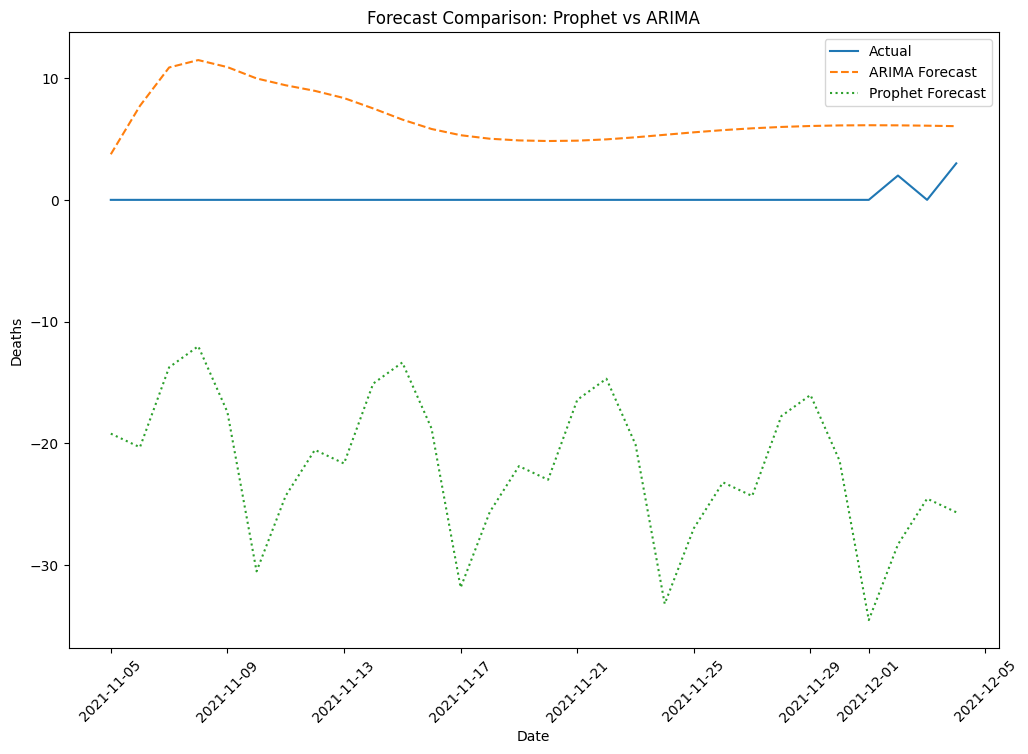

In [36]:
#Comparison with ARIMA
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# ARIMA expects just a 1D series
arima_model = ARIMA(train['y'], order=(5, 1, 2))  # (p,d,q) can be tuned
arima_result = arima_model.fit()

# Forecast 30 steps ahead
arima_forecast = arima_result.forecast(steps=30)

# Compare to test
plt.figure(figsize=(12,8))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(test['ds'], forecast_test['yhat'], label='Prophet Forecast', linestyle=':')
plt.legend()
plt.title("Forecast Comparison: Prophet vs ARIMA")
plt.xlabel("Date")
plt.ylabel("Deaths")
plt.xticks(rotation=45) # Rotate x-axis labels
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxho75uq_/j2e287o3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxho75uq_/vo0kqy6v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56562', 'data', 'file=/tmp/tmpxho75uq_/j2e287o3.json', 'init=/tmp/tmpxho75uq_/vo0kqy6v.json', 'output', 'file=/tmp/tmpxho75uq_/prophet_modeluz0wmpen/prophet_model-20250817055257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:52:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


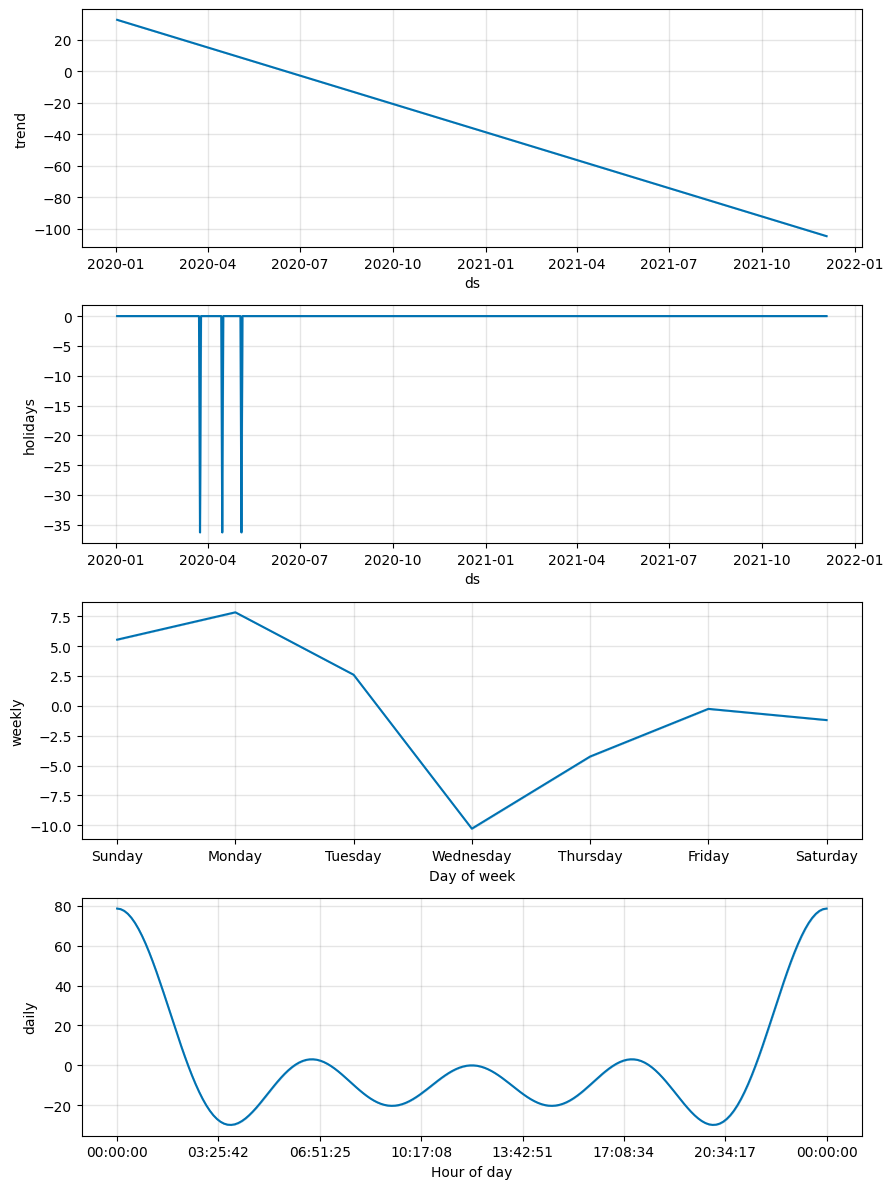

In [37]:
# Sample lockdown dates
lockdown_dates = pd.DataFrame({
    'ds': pd.to_datetime([
        '2020-03-24', '2020-04-15', '2020-05-04',  # First few Indian lockdowns
    ]),
    'holiday': 'lockdown'
})

# Add as holiday regressor
model_lock = Prophet(holidays=lockdown_dates, daily_seasonality=True)
model_lock.fit(train)

future_lock = model_lock.make_future_dataframe(periods=30)
forecast_lock = model_lock.predict(future_lock)

model_lock.plot_components(forecast_lock);


In [38]:
!pip install lifelines --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.6 MB/s eta 0:00:00


<lifelines.CoxPHFitter: fitted with 1.04858e+06 total observations, 1.01808e+06 right-censored observations>
             duration col = 'DURATION'
                event col = 'EVENT'
      baseline estimation = breslow
   number of observations = 1.04858e+06
number of events observed = 30492
   partial log-likelihood = -380394.14
         time fit was run = 2025-08-17 05:53:07 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
AGE           0.03      1.03      0.00            0.03            0.03                1.03                1.03
DIABETES     -0.01      0.99      0.00           -0.01           -0.00                0.99                1.00
OBESITY       0.00      1.00      0.00            0.00            0.01                1.00                1.01
COPD          0.01      1.01      0.00            0.00            0.01                1.00                1.01
ASTHMA        0.00      1.00      0.00           -0.00            0.00                1.00                1.00
INMSUPR       0.00      1.00      0.00           -0.00            0.00                1.00                1.00
HIPERTENSION  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ICU          -0.03      0.97      0.00           -0.03           -0.03                0.97                0.97
PNEUMONIA     0.01      1.01      0.00            0.01            0.02                1.01                1.02

              cmp to       z      p  -log2(p)
covariate                                    
AGE             0.00   91.87 <0.005       inf
DIABETES        0.00   -3.80 <0.005     12.76
OBESITY         0.00    4.47 <0.005     16.96
COPD            0.00    3.25 <0.005      9.76
ASTHMA          0.00    0.35   0.72      0.46
INMSUPR         0.00    0.62   0.54      0.89
HIPERTENSION    0.00    0.37   0.71      0.48
ICU             0.00 -164.69 <0.005       inf
PNEUMONIA       0.00   19.01 <0.005    265.39
---
Concordance = 0.91
Partial AIC = 760806.27
log-likelihood ratio test = 83734.04 on 9 df
-log2(p) of ll-ratio test = inf

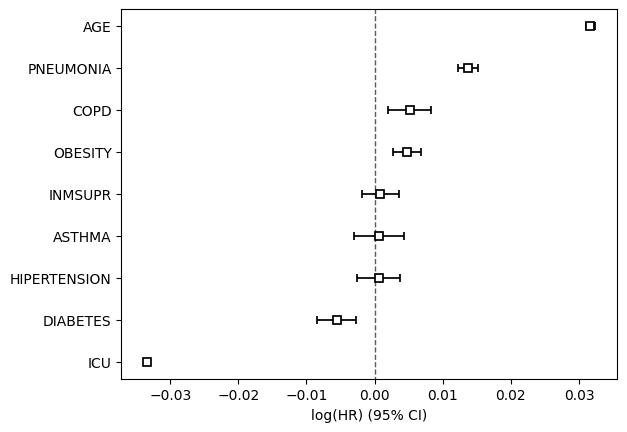

In [39]:
#Track-3:Survival Analysis
#Data Preparation For Survival Analysis

# Convert 'DATE_DIED' to datetime objects, coercing errors
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')

# Define the event: 1 if the patient died (DATE_DIED is not NaT), 0 otherwise
df['EVENT'] = df['DATE_DIED'].notna().astype(int)

# Define the duration: time from a reference point to the event or censoring
# We'll use the earliest date in the dataset as the reference point
earliest_date = df['DATE_DIED'].min()
latest_date = df['DATE_DIED'].max()

# Calculate duration for those who died: difference between death date and earliest date
df.loc[df['EVENT'] == 1, 'DURATION'] = (df['DATE_DIED'] - earliest_date).dt.days

# Calculate duration for those who survived: difference between latest date and earliest date
# This assumes all patients were observed until the latest date in the dataset if they didn't die
df.loc[df['EVENT'] == 0, 'DURATION'] = (latest_date - earliest_date).days # Corrected line

# Ensure DURATION is numeric and handle potential NaNs created during date operations
df['DURATION'] = pd.to_numeric(df['DURATION'], errors='coerce')

from lifelines import CoxPHFitter

# Choose your features — adjust as needed
features = ['AGE', 'DIABETES', 'OBESITY', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'ICU', 'PNEUMONIA']
df_cox = df[['DURATION', 'EVENT'] + features].dropna()

# Ensure the duration column is not all the same value after processing
if df_cox['DURATION'].nunique() <= 1:
    print("Error: DURATION column has no variation. Cannot perform survival analysis.")
else:
    cph = CoxPHFitter()
    cph.fit(df_cox, duration_col='DURATION', event_col='EVENT')

    # Show model summary
    cph.print_summary()
    # Plotting the coefficients
    cph.plot()

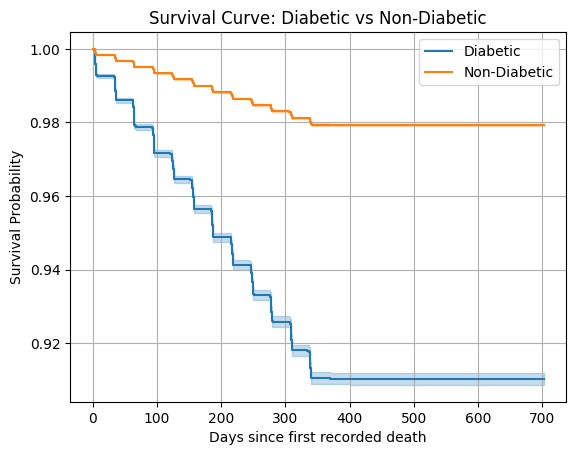

In [40]:
#Stratified Survival Curves
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

# Diabetic patients (DIABETES == 1.0 based on previous data inspection)
diabetic = df_cox[df_cox['DIABETES'] == 1.0]
# Non-diabetic patients (DIABETES == 2.0 based on previous data inspection)
non_diabetic = df_cox[df_cox['DIABETES'] == 2.0]

# Fit and plot for diabetic patients
if not diabetic.empty:
    kmf.fit(diabetic['DURATION'], event_observed=diabetic['EVENT'], label='Diabetic')
    ax = kmf.plot_survival_function()
else:
    ax = None
    print("No diabetic patients found in the filtered data.")


# Fit and plot for non-diabetic patients on same plot
if not non_diabetic.empty:
    if ax:
        kmf.fit(non_diabetic['DURATION'], event_observed=non_diabetic['EVENT'], label='Non-Diabetic')
        kmf.plot_survival_function(ax=ax)
    else:
        kmf.fit(non_diabetic['DURATION'], event_observed=non_diabetic['EVENT'], label='Non-Diabetic')
        ax = kmf.plot_survival_function()
else:
    print("No non-diabetic patients found in the filtered data.")

if ax:
    plt.title('Survival Curve: Diabetic vs Non-Diabetic')
    plt.xlabel('Days since first recorded death')
    plt.ylabel('Survival Probability')
    plt.grid(True)
    plt.show()
else:
    print("No data available to plot survival curves.")

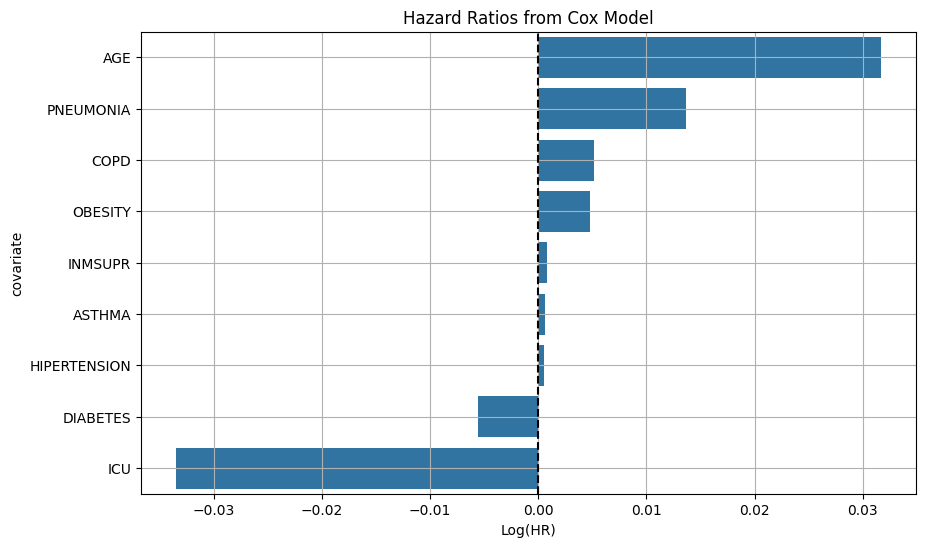

In [41]:
#Hazard Ratio Visualization
# Add more visual impact with sorted HRs
import seaborn as sns

summary_df = cph.summary.sort_values(by='coef', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='coef', y=summary_df.index, data=summary_df)
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Hazard Ratios from Cox Model')
plt.xlabel('Log(HR)')
plt.grid(True)
plt.show()


In [42]:
#Individual Risk Prediction
# Predict partial hazard (risk score)
df_cox['predicted_risk'] = cph.predict_partial_hazard(df_cox)

# Rename the column
df_cox.rename(columns={'predicted_risk': '%_predicted_risk'}, inplace=True)

# Show top 5 high-risk patients with integer values for the renamed column
display(df_cox[['AGE', 'DIABETES', 'OBESITY', '%_predicted_risk']].sort_values(by='%_predicted_risk', ascending=False).head().astype({'%_predicted_risk': int}))

AGE  DIABETES  OBESITY  %_predicted_risk
346064   93         1       98               203
343959   89         1       98               183
460413  102        98       98               161
863205  118         2        2               144
455228   79         1       98               135

In [43]:
!pip install lifelines

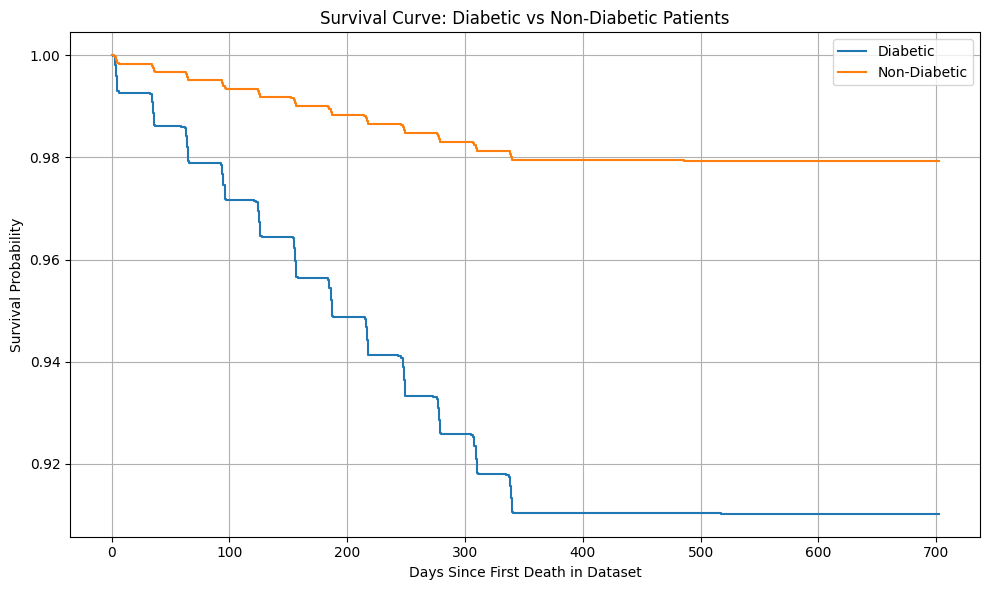

In [44]:
#Plotting Kaplan-Meier Surviavl Plot
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset again if needed
df = pd.read_csv('/content/Covid Data.csv')  # or wherever it's stored

# Convert DATE_DIED to datetime
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')
df['EVENT'] = df['DATE_DIED'].notna().astype(int)

# Calculate duration
earliest_date = df['DATE_DIED'].min()
latest_date = df['DATE_DIED'].max()

df.loc[df['EVENT'] == 1, 'DURATION'] = (df['DATE_DIED'] - earliest_date).dt.days
df.loc[df['EVENT'] == 0, 'DURATION'] = (latest_date - earliest_date).days
df['DURATION'] = pd.to_numeric(df['DURATION'], errors='coerce')

# Drop NA
df_cox = df[['DURATION', 'EVENT', 'DIABETES']].dropna()

# Kaplan-Meier Plot
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

# Diabetic patients
diabetic = df_cox[df_cox['DIABETES'] == 1.0]
kmf.fit(diabetic['DURATION'], event_observed=diabetic['EVENT'], label='Diabetic')
ax = kmf.plot_survival_function(ci_show=False)

# Non-Diabetic patients
non_diabetic = df_cox[df_cox['DIABETES'] == 2.0]
kmf.fit(non_diabetic['DURATION'], event_observed=non_diabetic['EVENT'], label='Non-Diabetic')
kmf.plot_survival_function(ax=ax, ci_show=False)

plt.title('Survival Curve: Diabetic vs Non-Diabetic Patients')
plt.xlabel('Days Since First Death in Dataset')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

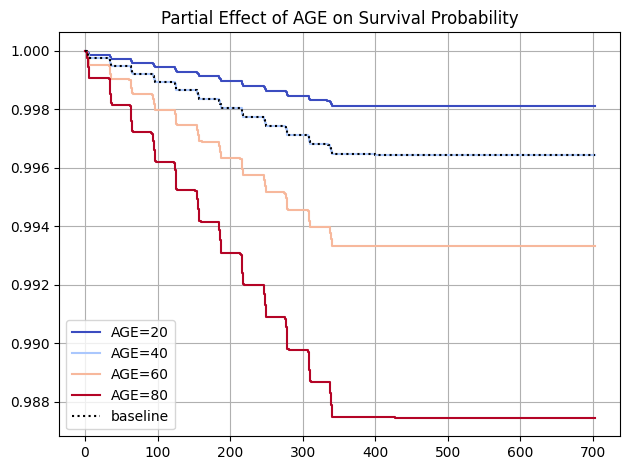

In [45]:
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
import pandas as pd

# Reload dataset if needed
df = pd.read_csv('/content/Covid Data.csv')  # Replace with your path if different

# Prepare for survival analysis
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')
df['EVENT'] = df['DATE_DIED'].notna().astype(int)

earliest_date = df['DATE_DIED'].min()
latest_date = df['DATE_DIED'].max()

df.loc[df['EVENT'] == 1, 'DURATION'] = (df['DATE_DIED'] - earliest_date).dt.days
df.loc[df['EVENT'] == 0, 'DURATION'] = (latest_date - earliest_date).days
df['DURATION'] = pd.to_numeric(df['DURATION'], errors='coerce')

# Choose features for Cox Regression
features = ['AGE', 'DIABETES', 'OBESITY', 'COPD', 'ASTHMA', 'INMSUPR',
            'HIPERTENSION', 'ICU', 'PNEUMONIA']
df_cox = df[['DURATION', 'EVENT'] + features].dropna()

# Fit the Cox model
cph = CoxPHFitter()
cph.fit(df_cox, duration_col='DURATION', event_col='EVENT')

# Partial effects plot (e.g., for AGE)
cph.plot_partial_effects_on_outcome(covariates='AGE',
                                     values=[20, 40, 60, 80],
                                     cmap='coolwarm')
plt.title('Partial Effect of AGE on Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


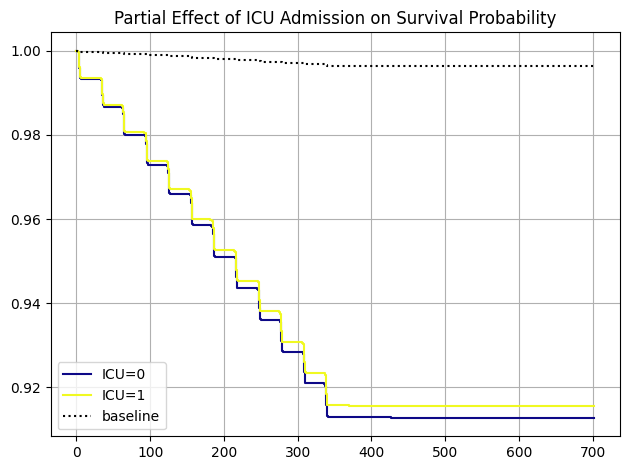

In [46]:
# For ICU
cph.plot_partial_effects_on_outcome('ICU', [0, 1], cmap='plasma')
plt.title('Partial Effect of ICU Admission on Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


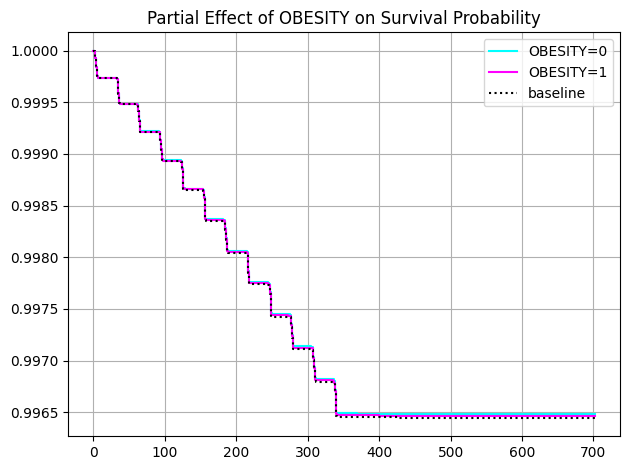

In [47]:
#Obesity Comparison
cph.plot_partial_effects_on_outcome(covariates='OBESITY', values=[0, 1], cmap='cool')
plt.title('Partial Effect of OBESITY on Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


# 📍 Track 4: Explainability & Model Trust

In this section, we shift our focus from model accuracy to interpretability. Complex machine learning models, such as XGBoost, often act as "black boxes"—delivering strong performance but offering little insight into *why* a specific prediction was made.

To address this, we leverage SHAP (SHapley Additive exPlanations), a powerful game-theoretic framework that helps break down predictions into individual feature contributions. This not only improves transparency and trust in the model but also provides actionable insights for clinicians and hospital administrators.

We will use SHAP to:
- Visualize feature importance at the global and individual level
- Understand how each feature pushes predictions higher or lower
- Explore specific patient cases to understand model decisions

Let’s dive in and explain what the model *thinks*!


In [48]:
#Data Preparation For SHAP
import shap

# Select a small subset of data for faster visualization
sample_X = X.sample(200, random_state=42)

# Create SHAP explainer for the XGBoost model
explainer = shap.Explainer(xgb, sample_X)

# Compute SHAP values
shap_values = explainer(sample_X)

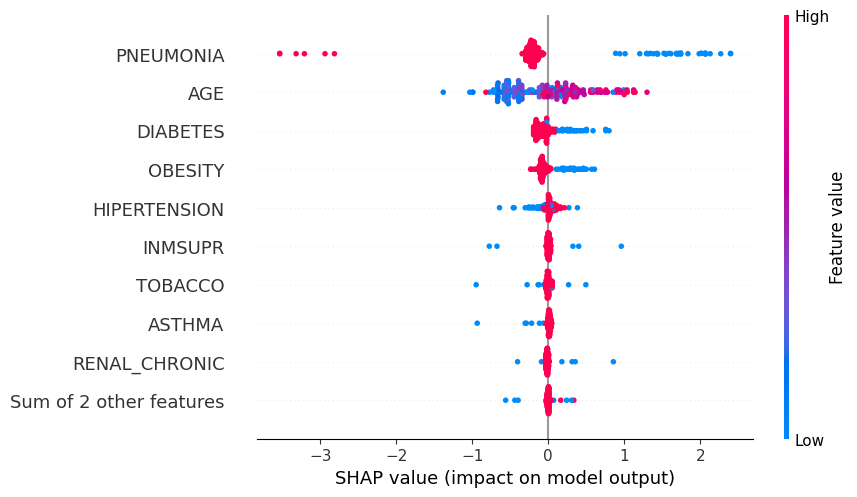

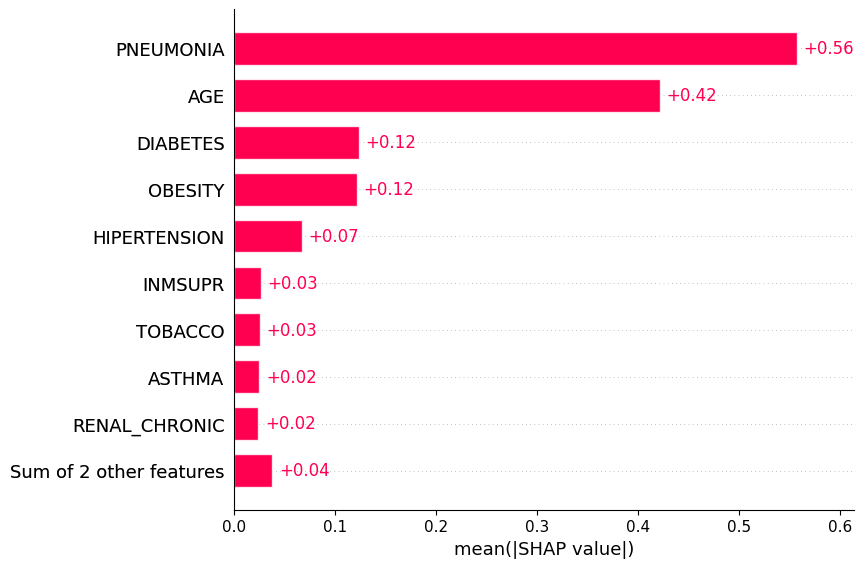

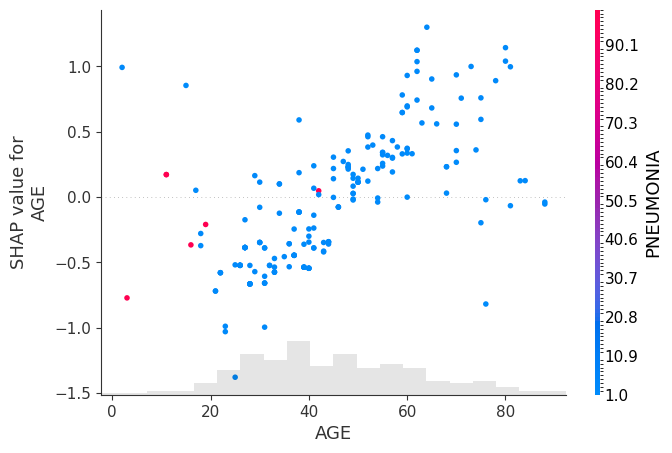

In [49]:
#Plotting Visualizations
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)
shap.plots.scatter(shap_values[:, "AGE"], color=shap_values)
# Choose a single patient (row)
i = 5
shap.plots.force(shap_values[i])


In [50]:
#Identifying Misclassified Casses
from sklearn.metrics import accuracy_score

# Get predictions and probabilities from XGBoost
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]

# Identify misclassified cases
misclassified = (y_pred != y_test)

# Create a DataFrame for analysis
misclassified_df = X_test[misclassified].copy()
misclassified_df["Actual"] = y_test[misclassified]
misclassified_df["Predicted"] = y_pred[misclassified]
misclassified_df["Probability"] = y_proba[misclassified]

In [51]:
# Top 10 confident wrong predictions
top_misclassified = misclassified_df.sort_values(by="Probability", ascending=False).head(10)
# Use the same SHAP explainer
explainer = shap.Explainer(xgb, X)

# Get SHAP values for these misclassified examples
shap_values_misclassified = explainer(top_misclassified.drop(columns=["Actual", "Predicted", "Probability"]))
# Force plot for the first misclassified patient
shap.plots.force(shap_values_misclassified[0])
for i in range(len(top_misclassified)):
    print(f"Patient {i+1}: Actual={top_misclassified.iloc[i]['Actual']}, Predicted={top_misclassified.iloc[i]['Predicted']}")
    shap.plots.force(shap_values_misclassified[i])

Patient 1: Actual=0.0, Predicted=1.0
Patient 2: Actual=0.0, Predicted=1.0
Patient 3: Actual=0.0, Predicted=1.0
Patient 4: Actual=0.0, Predicted=1.0
Patient 5: Actual=0.0, Predicted=1.0
Patient 6: Actual=0.0, Predicted=1.0
Patient 7: Actual=1.0, Predicted=0.0
Patient 8: Actual=1.0, Predicted=0.0
Patient 9: Actual=1.0, Predicted=0.0
Patient 10: Actual=1.0, Predicted=0.0


In [52]:
#Grid for SHAP Visualizations
import shap
shap.initjs()
from IPython.display import display, HTML

def display_shap_force_grid(shap_values, base_value, features, max_plots=6):
    """Display SHAP force plots in a horizontal grid layout."""
    force_html = ""

    for i in range(min(max_plots, len(shap_values))):
        force_html += f"""
        <div style="margin: 10px; display: inline-block; width: 500px; vertical-align: top;">
            <p><strong>Patient {i+1}</strong></p>
            {shap.plots.force(base_value, shap_values[i].values, features.iloc[i], matplotlib=False)}
        </div>
        """

    display(HTML(f"<div style='display: flex; flex-wrap: wrap'>{force_html}</div>"))
# Run the grid on top misclassified patients
display_shap_force_grid(shap_values_misclassified, shap_values_misclassified.base_values, top_misclassified.drop(columns=["Actual", "Predicted", "Probability"]))


Brier Score: 0.0099


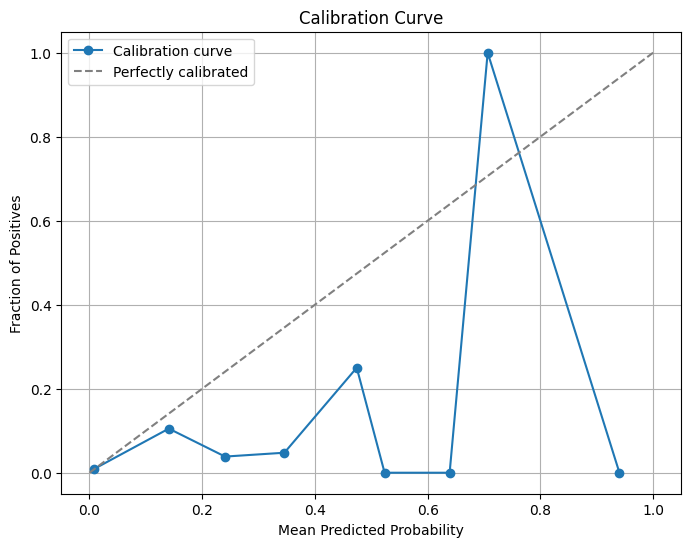

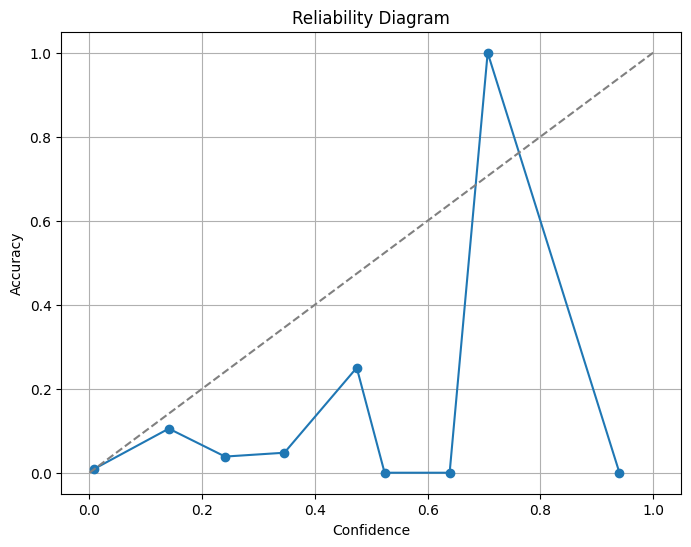

In [53]:
#Trust Evaluation Metrics
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
import numpy as np
# Brier score
brier = brier_score_loss(y_test, y_prob_xgb)
print(f"Brier Score: {brier:.4f}")

# Calibration Curve
prob_true, prob_pred = calibration_curve(y_test, y_prob_xgb, n_bins=10)

# Plot
plt.figure(figsize=(8,6))
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
plt.title("Calibration Curve")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.legend()
plt.grid(True)
plt.show()
def reliability_diagram(y_true, y_prob, bins=10):
    bin_edges = np.linspace(0.0, 1.0, bins + 1)
    binids = np.digitize(y_prob, bin_edges) - 1
    bin_sums = np.bincount(binids, weights=y_prob, minlength=len(bin_edges))
    bin_total = np.bincount(binids, minlength=len(bin_edges))
    bin_correct = np.bincount(binids, weights=y_true, minlength=len(bin_edges))

    nonzero = bin_total != 0
    accuracy = bin_correct[nonzero] / bin_total[nonzero]
    confidence = bin_sums[nonzero] / bin_total[nonzero]

    plt.figure(figsize=(8,6))
    plt.plot(confidence, accuracy, marker='o')
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.title("Reliability Diagram")
    plt.xlabel("Confidence")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()

reliability_diagram(y_test, y_prob_xgb)

In [54]:
#Defining ECE Function
import numpy as np

def compute_ece(y_true, y_probs, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(y_probs, bins) - 1

    ece = 0.0
    total_count = len(y_probs)

    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)

        if bin_size > 0:
            bin_confidence = np.mean(y_probs[bin_mask])
            bin_accuracy = np.mean(y_true[bin_mask])
            ece += (bin_size / total_count) * abs(bin_confidence - bin_accuracy)

    return ece
ece_score = compute_ece(y_true=np.array(y_test), y_probs=np.array(y_prob_xgb), n_bins=10)
print(f"Expected Calibration Error (ECE): {ece_score:.4f}")

Expected Calibration Error (ECE): 0.0011


In [55]:
#Uncertainty Quantifiaction
from scipy.stats import entropy
import numpy as np

def prediction_entropy(y_probs):
    # For binary classification, you need both probabilities (p and 1-p)
    y_probs = np.array(y_probs)
    probs = np.vstack([y_probs, 1 - y_probs]).T
    entropies = [entropy(p) for p in probs]
    return entropies
entropies = prediction_entropy(y_prob_xgb)
# Top 5 most uncertain predictions
uncertain_idx = np.argsort(entropies)[-5:]
for idx in uncertain_idx:
    print(f"Index: {idx}, Prob: {y_prob_xgb[idx]:.4f}, Entropy: {entropies[idx]:.4f}, True: {y_test.iloc[idx]}")

Index: 18821, Prob: 0.4850, Entropy: 0.6927, True: 0
Index: 6418, Prob: 0.4850, Entropy: 0.6927, True: 1
Index: 9933, Prob: 0.4850, Entropy: 0.6927, True: 0
Index: 32553, Prob: 0.5026, Entropy: 0.6931, True: 0
Index: 3686, Prob: 0.5009, Entropy: 0.6931, True: 0


In [56]:
#Compute Entropy Based Uncertainty
from scipy.stats import entropy
import numpy as np

def prediction_entropy(y_probs):
    # Create probability distributions for binary classification
    y_probs = np.array(y_probs)
    probs = np.vstack([y_probs, 1 - y_probs]).T
    return [entropy(p) for p in probs]

# y_probs = your predicted probabilities (between 0 and 1)
uncertainties = prediction_entropy(y_prob_xgb)

/tmp/ipython-input-1532691540.py:10: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


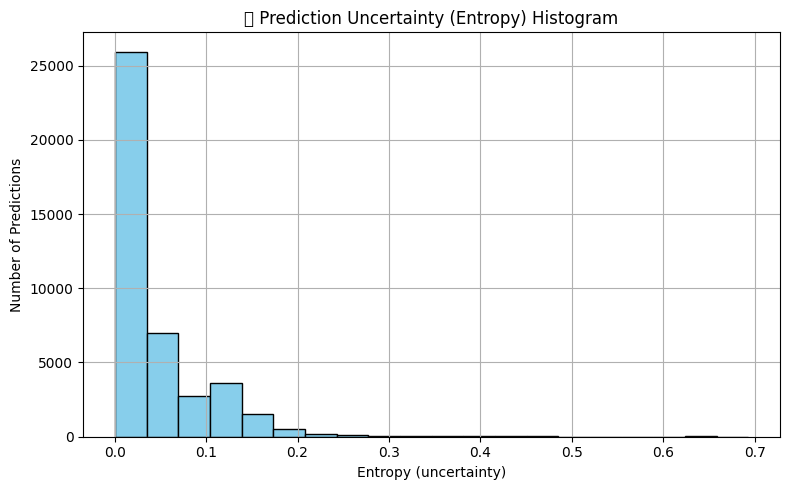

In [57]:
#Plotting The Histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(uncertainties, bins=20, color='skyblue', edgecolor='black')
plt.title("🧠 Prediction Uncertainty (Entropy) Histogram")
plt.xlabel("Entropy (uncertainty)")
plt.ylabel("Number of Predictions")
plt.grid(True)
plt.tight_layout()
plt.show()


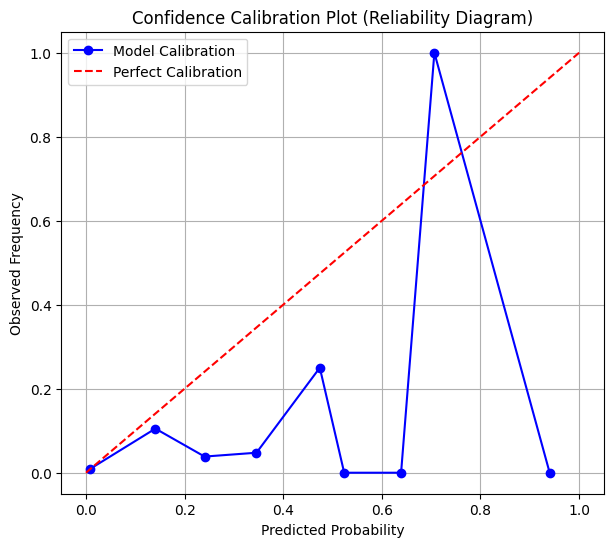

In [59]:
#Confidence Calibration Plot (Reliability Diagram)
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Assume you have true labels (y_test) and predicted probabilities (y_probs)
prob_true, prob_pred = calibration_curve(y_test, y_prob_xgb, n_bins=10)

plt.figure(figsize=(7,6))
plt.plot(prob_pred, prob_true, marker='o', label="Model Calibration", color="blue")
plt.plot([0,1],[0,1], linestyle="--", label="Perfect Calibration", color="red")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Confidence Calibration Plot (Reliability Diagram)")
plt.legend()
plt.grid(True)
plt.show()

In [61]:
#Prediction Interval Coverage
import numpy as np

def prediction_interval_coverage(y_true, y_prob_xgb, alpha=0.05):
    """
    Computes coverage of prediction intervals for binary classification.
    alpha = significance level (default 0.05 for 95% interval)
    """
    lower = alpha/2
    upper = 1 - alpha/2

    # Interval = [lower_bound, upper_bound]
    in_interval = ((y_prob_xgb >= lower) & (y_prob_xgb <= upper)).astype(int)

    coverage = np.mean(in_interval == y_true)
    return coverage

# Example: 95% interval
coverage_95 = prediction_interval_coverage(y_test, y_prob_xgb, alpha=0.05)
print(f"95% Prediction Interval Coverage: {coverage_95:.3f}")

95% Prediction Interval Coverage: 0.881


In this step, we adapt prediction interval (PI) analysis — typically used for regression — to our classification probabilities.
Instead of hard class labels, we treat predicted probabilities as continuous outputs and construct uncertainty bands around them.

In [63]:
#Generate Prediction Intervals
import numpy as np

def get_prediction_intervals(y_prob_xgb, alpha=0.05):
    """
    Returns prediction intervals around predicted probabilities.
    For each probability, we construct [p - margin, p + margin],
    where margin is based on alpha (significance level).
    """
    margin = alpha / 2
    lower_bounds = np.clip(y_prob_xgb - margin, 0, 1)
    upper_bounds = np.clip(y_prob_xgb + margin, 0, 1)
    return lower_bounds, upper_bounds

# Example: 95% interval
lower, upper = get_prediction_intervals(y_prob_xgb, alpha=0.05)

In [64]:
#Coverage Probability
def prediction_interval_coverage(y_true, lower, upper):
    """
    Calculates the fraction of true outcomes that fall inside [lower, upper].
    """
    coverage = np.mean((y_true >= lower) & (y_true <= upper))
    return coverage

coverage_95 = prediction_interval_coverage(y_test, lower, upper)
print(f"95% Prediction Interval Coverage: {coverage_95:.3f}")

95% Prediction Interval Coverage: 0.877


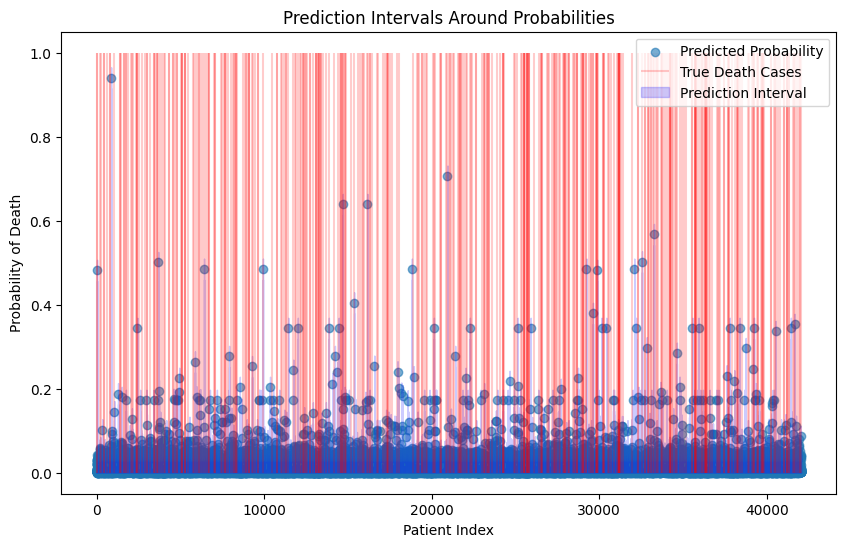

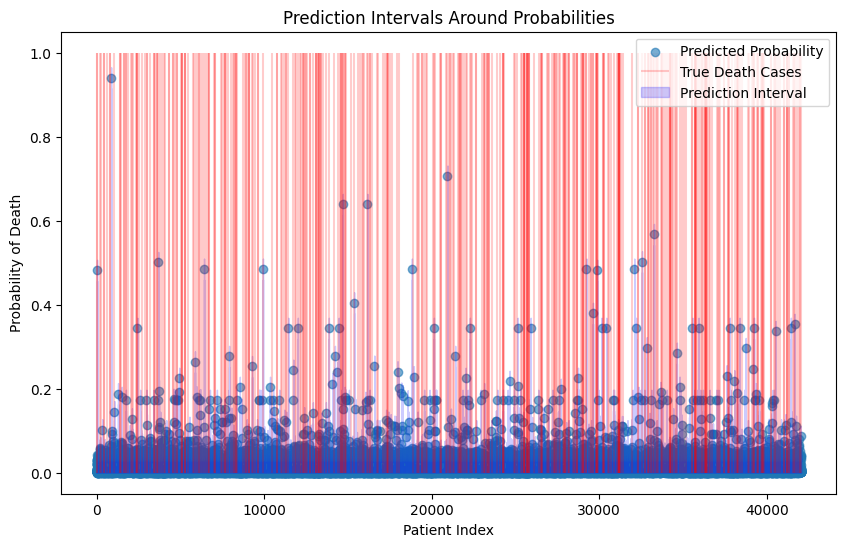

In [66]:
#Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(range(len(y_prob_xgb)), y_prob_xgb, label="Predicted Probability", alpha=0.6)
plt.vlines(np.where(y_test==1), ymin=0, ymax=1, color="red", alpha=0.2, label="True Death Cases")

plt.fill_between(range(len(y_prob_xgb)), lower, upper, color="blue", alpha=0.2, label="Prediction Interval")

plt.xlabel("Patient Index")
plt.ylabel("Probability of Death")
plt.title("Prediction Intervals Around Probabilities")
plt.legend()
plt.show()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(range(len(y_prob_xgb)), y_prob_xgb, label="Predicted Probability", alpha=0.6)
plt.vlines(np.where(y_test==1), ymin=0, ymax=1, color="red", alpha=0.2, label="True Death Cases")

plt.fill_between(range(len(y_prob_xgb)), lower, upper, color="blue", alpha=0.2, label="Prediction Interval")

plt.xlabel("Patient Index")
plt.ylabel("Probability of Death")
plt.title("Prediction Intervals Around Probabilities")
plt.legend()
plt.show()

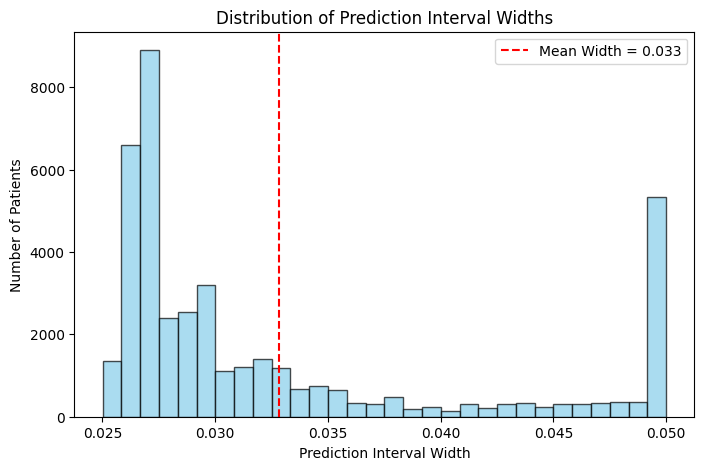

In [67]:
#Prediction Interval Width Distribution
# Interval widths
interval_widths = upper - lower
plt.figure(figsize=(8,5))
plt.hist(interval_widths, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(np.mean(interval_widths), color="red", linestyle="--", label=f"Mean Width = {np.mean(interval_widths):.3f}")

plt.xlabel("Prediction Interval Width")
plt.ylabel("Number of Patients")
plt.title("Distribution of Prediction Interval Widths")
plt.legend()
plt.show()
# Interpretation
# Narrow widths (close to 0) → Model is very confident about those patients.
# Wide widths → Model is uncertain, possibly due to ambiguous features or class overlap.
# Bimodal distribution → Some groups of patients are consistently predicted with high certainty, while others are systematically uncertain.

# Interpretation of Prediction Interval Widths

*   **Narrow widths (close to 0)**: The model is very confident about the predictions for these patients.
*   **Wide widths**: The model is uncertain about these predictions, possibly due to ambiguous features or class overlap in the data.
*   **Bimodal distribution**: This might indicate that some groups of patients are consistently predicted with high certainty, while others are systematically uncertain.

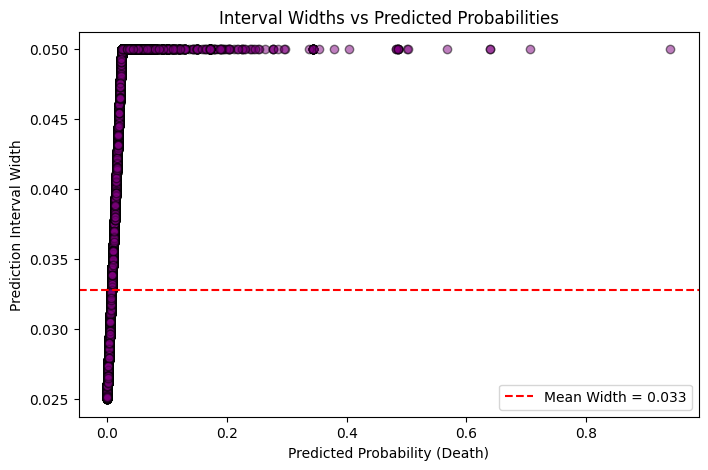

In [69]:
#Prediction Interval Widths vs Predicted Probabilities
plt.figure(figsize=(8,5))
plt.scatter(y_prob_xgb, interval_widths, alpha=0.5, color="purple", edgecolor="black")

plt.xlabel("Predicted Probability (Death)")
plt.ylabel("Prediction Interval Width")
plt.title("Interval Widths vs Predicted Probabilities")
plt.axhline(np.mean(interval_widths), color="red", linestyle="--", label=f"Mean Width = {np.mean(interval_widths):.3f}")
plt.legend()
plt.show()

/tmp/ipython-input-2070205857.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df_bins.groupby("prob_bin")["interval_widths"].mean().reset_index()


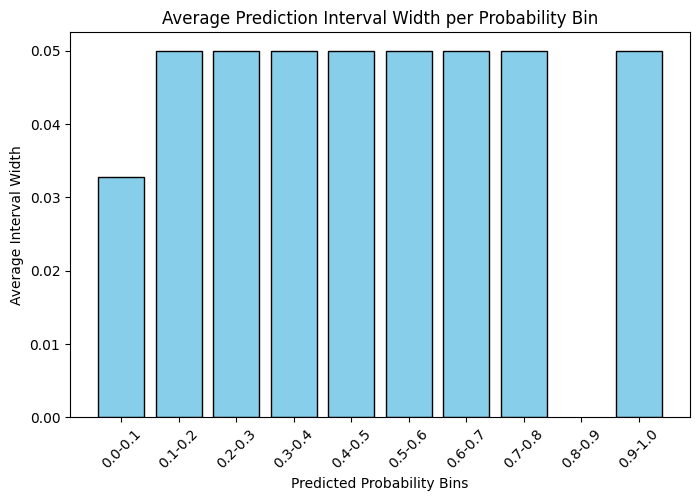

In [71]:
#Binned Plot: Average Interval Widths vs Predicted Probabilities
import pandas as pd

# Create bins for predicted probabilities
bins = np.linspace(0, 1, 11)  # 0-0.1, 0.1-0.2, ..., 0.9-1.0
bin_labels = [f"{round(bins[i],1)}-{round(bins[i+1],1)}" for i in range(len(bins)-1)]

df_bins = pd.DataFrame({
    "y_pred_prob": y_prob_xgb,
    "interval_widths": interval_widths
})
df_bins["prob_bin"] = pd.cut(df_bins["y_pred_prob"], bins=bins, labels=bin_labels, include_lowest=True)

# Compute average interval width per bin
bin_summary = df_bins.groupby("prob_bin")["interval_widths"].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
plt.bar(bin_summary["prob_bin"], bin_summary["interval_widths"], color="skyblue", edgecolor="black")
plt.xticks(rotation=45)
plt.xlabel("Predicted Probability Bins")
plt.ylabel("Average Interval Width")
plt.title("Average Prediction Interval Width per Probability Bin")
plt.show()

/tmp/ipython-input-1711207139.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df_bins.groupby("prob_bin")["interval_widths"].mean().reset_index()


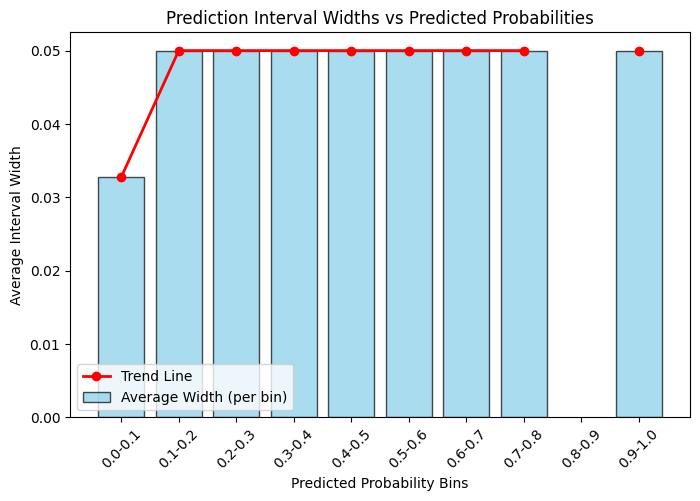

In [73]:
import pandas as pd

# Create bins for predicted probabilities
bins = np.linspace(0, 1, 11)  # 0-0.1, 0.1-0.2, ..., 0.9-1.0
bin_labels = [f"{round(bins[i],1)}-{round(bins[i+1],1)}" for i in range(len(bins)-1)]

df_bins = pd.DataFrame({
    "y_pred_prob": y_prob_xgb,
    "interval_widths": interval_widths
})
df_bins["prob_bin"] = pd.cut(df_bins["y_pred_prob"], bins=bins, labels=bin_labels, include_lowest=True)

# Compute average interval width per bin
bin_summary = df_bins.groupby("prob_bin")["interval_widths"].mean().reset_index()

# Plot with line overlay
plt.figure(figsize=(8,5))
plt.bar(bin_summary["prob_bin"], bin_summary["interval_widths"],
        color="skyblue", edgecolor="black", alpha=0.7, label="Average Width (per bin)")
plt.plot(bin_summary["prob_bin"], bin_summary["interval_widths"],
         color="red", marker="o", linewidth=2, label="Trend Line")
plt.xticks(rotation=45)
plt.xlabel("Predicted Probability Bins")
plt.ylabel("Average Interval Width")
plt.title("Prediction Interval Widths vs Predicted Probabilities")
plt.legend()
plt.show()

**Interpretation**

The red line emphasizes the trend across bins.

Expect to see a U-shape or inverted bell shape, with:

*   Narrower widths near 0 & 1 → higher confidence.
*   Wider widths near 0.5 → greatest uncertainty.

If the line is flat → model may not be adjusting uncertainty according to probability.

/tmp/ipython-input-459420103.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df_bins.groupby("prob_bin")["interval_widths"].mean().reset_index()


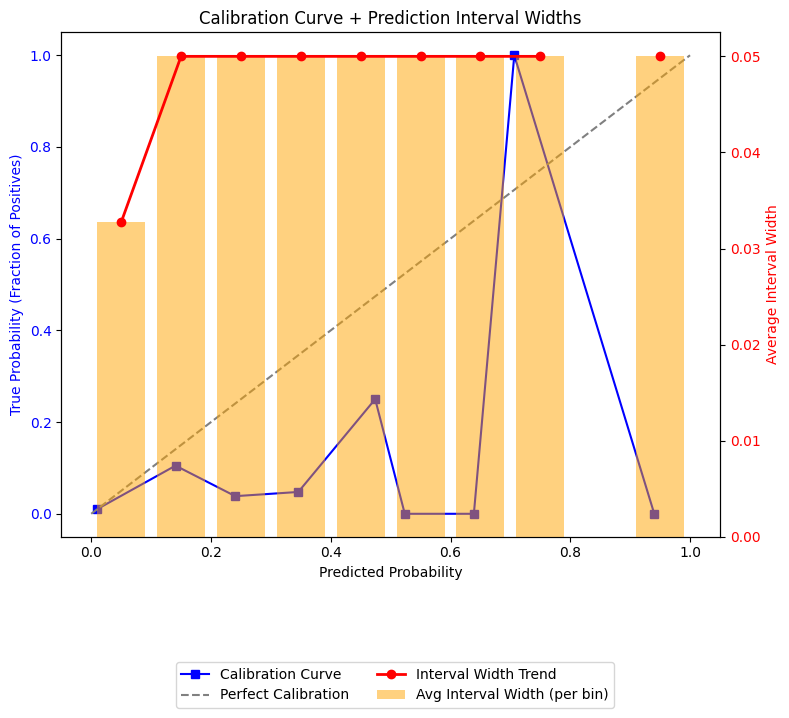

In [75]:
#Combined Calibration–Uncertainty Plot
from sklearn.calibration import calibration_curve

# Calibration curve (true freq vs predicted prob)
prob_true, prob_pred = calibration_curve(y_test, y_prob_xgb, n_bins=10)

# Interval width summary (from earlier binned analysis)
bins = np.linspace(0, 1, 11)
df_bins = pd.DataFrame({
    "y_pred_prob": y_prob_xgb,
    "interval_widths": interval_widths
})
df_bins["prob_bin"] = pd.cut(df_bins["y_pred_prob"], bins=bins, include_lowest=True)
bin_summary = df_bins.groupby("prob_bin")["interval_widths"].mean().reset_index()

# Convert bin labels to midpoints for alignment
bin_midpoints = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
bin_summary["bin_mid"] = bin_midpoints

# Plot combined figure
fig, ax1 = plt.subplots(figsize=(8,6))

# --- Left Y-axis: Calibration curve ---
ax1.plot(prob_pred, prob_true, "s-", label="Calibration Curve", color="blue")
ax1.plot([0,1], [0,1], "--", color="gray", label="Perfect Calibration")
ax1.set_xlabel("Predicted Probability")
ax1.set_ylabel("True Probability (Fraction of Positives)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# --- Right Y-axis: Interval Widths ---
ax2 = ax1.twinx()
ax2.bar(bin_summary["bin_mid"], bin_summary["interval_widths"],
        width=0.08, color="orange", alpha=0.5, label="Avg Interval Width (per bin)")
ax2.plot(bin_summary["bin_mid"], bin_summary["interval_widths"],
         color="red", marker="o", linewidth=2, label="Interval Width Trend")
ax2.set_ylabel("Average Interval Width", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Legends
fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title("Calibration Curve + Prediction Interval Widths")
plt.tight_layout()
plt.show()

**Interpretation**

*   **Blue Line (Calibration Curve)**

    Shows how well predicted probabilities match true outcomes.

    Deviation from diagonal = miscalibration.

*   **Orange Bars + Red Line (Interval Widths)**

    Show how uncertainty varies with predicted probability.

    Wider near 0.5 → model less confident.

    Narrow near 0 or 1 → model more confident.

The overlay connects trustworthiness (calibration) with uncertainty quantification in one visual.

/tmp/ipython-input-239471468.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df_bins.groupby("prob_bin")["interval_widths"].mean().reset_index()


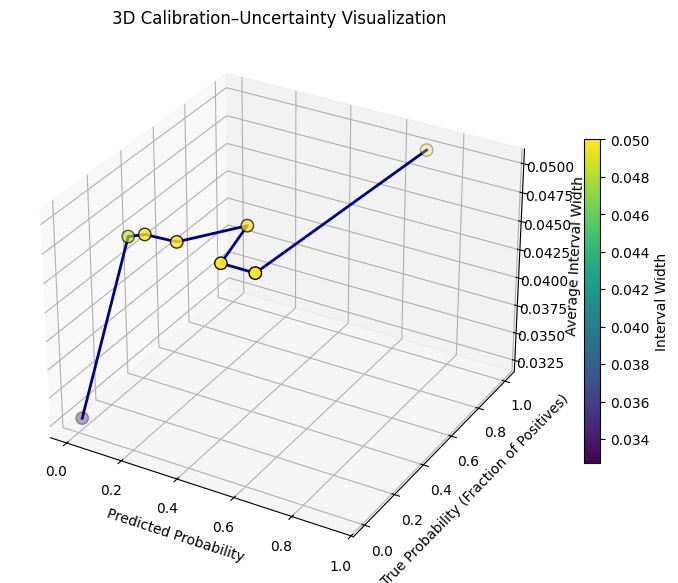

In [77]:
#3D Calibration–Uncertainty Visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calibration curve (true freq vs predicted prob)
prob_true, prob_pred = calibration_curve(y_test, y_prob_xgb, n_bins=10)

# Interval width summary (from earlier binned analysis)
bins = np.linspace(0, 1, 11)
df_bins = pd.DataFrame({
    "y_pred_prob": y_prob_xgb,
    "interval_widths": interval_widths
})
df_bins["prob_bin"] = pd.cut(df_bins["y_pred_prob"], bins=bins, include_lowest=True)
bin_summary = df_bins.groupby("prob_bin")["interval_widths"].mean().reset_index()

# Convert bin labels to midpoints for alignment
bin_midpoints = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
bin_summary["bin_mid"] = bin_midpoints

# Match calibration curve bins with interval widths (approx by aligning bin_mid with prob_pred)
z_interval = np.interp(prob_pred, bin_summary["bin_mid"], bin_summary["interval_widths"])

# --- 3D Plot ---
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection="3d")

# Scatter calibration points in 3D
sc = ax.scatter(prob_pred, prob_true, z_interval,
                c=z_interval, cmap="viridis", s=80, edgecolor="k")

# Connect points to form calibration-uncertainty curve in 3D
ax.plot(prob_pred, prob_true, z_interval, color="darkblue", linewidth=2)

# Axes labels
ax.set_xlabel("Predicted Probability")
ax.set_ylabel("True Probability (Fraction of Positives)")
ax.set_zlabel("Average Interval Width")

# Color bar for interval width intensity
cbar = plt.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label("Interval Width")

plt.title("3D Calibration–Uncertainty Visualization")
plt.show()

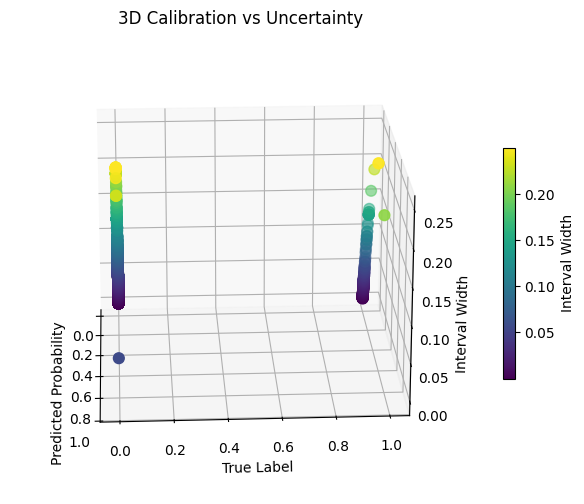

In [79]:
#Rotating GIF
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from sklearn.calibration import calibration_curve

# ---- Example: Using your y_test and y_pred_proba ----
# Replace with your actual model outputs
# y_test = ...
# y_pred_proba = ...

# Calibration curve (true prob vs predicted prob)
prob_true, prob_pred = calibration_curve(y_test, y_prob_xgb, n_bins=10)

# Example: Interval widths (from previous uncertainty step)
# Here I approximate: width = prob_pred * (1 - prob_pred)
interval_widths = y_prob_xgb * (1 - y_prob_xgb)


# ---- Create 3D Figure ----
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(y_prob_xgb, y_test, interval_widths, c=interval_widths, cmap='viridis', s=60)

ax.set_xlabel("Predicted Probability")
ax.set_ylabel("True Label")
ax.set_zlabel("Interval Width")
ax.set_title("3D Calibration vs Uncertainty")

fig.colorbar(scatter, ax=ax, shrink=0.5, label="Interval Width")

# ---- Animation function ----
def rotate(angle):
    ax.view_init(elev=20, azim=angle)

ani = FuncAnimation(fig, rotate, frames=np.arange(0, 360, 3), interval=100)

# Save as GIF
ani.save('3d_calibration_uncertainty.gif', writer='pillow')

plt.show()

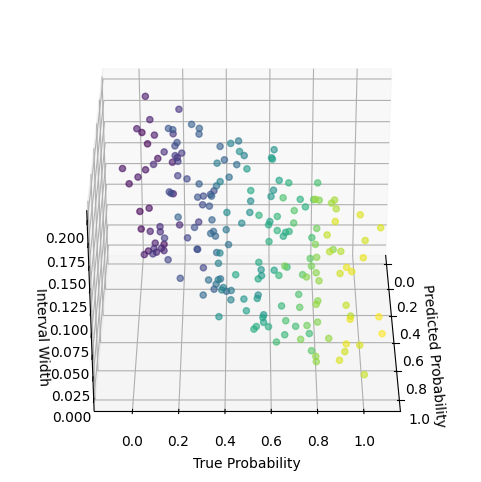

In [80]:
#MP4 Inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Example data (replace with your arrays)
predicted_probs = np.random.rand(200)
true_probs = predicted_probs + np.random.normal(0, 0.05, 200)
interval_widths = np.random.rand(200) * 0.2

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(predicted_probs, true_probs, interval_widths, alpha=0.6, c=predicted_probs, cmap='viridis')
ax.set_xlabel("Predicted Probability")
ax.set_ylabel("True Probability")
ax.set_zlabel("Interval Width")

def rotate(angle):
    ax.view_init(30, angle)

ani = FuncAnimation(fig, rotate, frames=np.arange(0, 360, 6), interval=120)

# Save as MP4 (much lighter than GIF)
ani.save("3d_calibration_uncertainty.mp4", writer="ffmpeg", dpi=80)

# Display inline
HTML('<video width="600" controls><source src="3d_calibration_uncertainty.mp4" type="video/mp4"></video>')

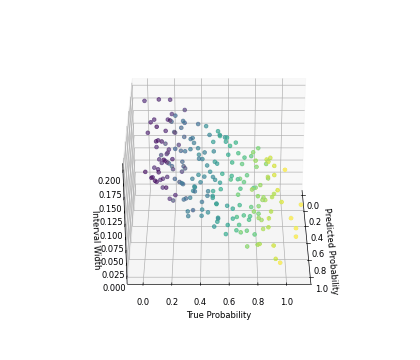

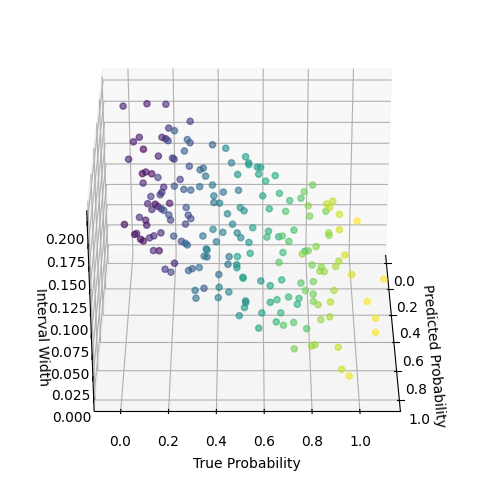

In [81]:
#Lightweight GIF
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import Image

predicted_probs = np.random.rand(200)
true_probs = predicted_probs + np.random.normal(0, 0.05, 200)
interval_widths = np.random.rand(200) * 0.2

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(predicted_probs, true_probs, interval_widths, alpha=0.6, c=predicted_probs, cmap='viridis')
ax.set_xlabel("Predicted Probability")
ax.set_ylabel("True Probability")
ax.set_zlabel("Interval Width")

def rotate(angle):
    ax.view_init(30, angle)

# Fewer frames + lower dpi = smaller file
ani = FuncAnimation(fig, rotate, frames=np.arange(0, 360, 12), interval=150)
ani.save("3d_calibration_uncertainty.gif", writer="pillow", dpi=60)

# Display inline
Image(filename="3d_calibration_uncertainty.gif")

### 🎥 3D Calibration–Uncertainty Visualization

This animation shows the relationship between:

- **X-axis (Predicted Probability):** The model’s estimated probability of a positive outcome.  
- **Y-axis (True Probability):** Empirical probability (from observed outcomes).  
- **Z-axis (Prediction Interval Width):** A measure of uncertainty — wider intervals indicate less confidence.  

🔄 The rotating 3D plot helps us see how **model calibration (confidence vs. truth)** and **uncertainty estimation (interval widths)** interact.  

- Well-calibrated models should align along the diagonal (Predicted ≈ True).  
- Narrow interval widths suggest the model is confident, while wider bands indicate uncertainty.  
- By rotating the view, we can detect **clusters of miscalibration** or **regions with inflated uncertainty** (often around predicted probabilities near 0.5).  

This visualization ties **calibration metrics (ECE)** and **prediction interval coverage** together in one interpretable 3D space — making it easier to **trust and explain** model behavior.

---

### 🔑 Key Insights (Fill After Analysis)

- **Calibration Quality:**  
  - Does the model follow the diagonal closely, or are there systematic deviations?  

- **Uncertainty Patterns:**  
  - Are wider intervals concentrated around predicted probabilities near 0.5?  
  - Are there unexpected wide intervals at extreme probabilities (close to 0 or 1)?  

- **Trustworthiness:**  
  - Does the uncertainty information complement calibration (e.g., low calibration error + reasonable interval widths)?  

- **Actionable Findings:**  
  - Example: “The model shows good calibration overall, but uncertainty is inflated for mid-range probabilities (0.4–0.6). This suggests potential refinement in these regions.”  

---


## What-If Analysis

What-If Analysis is a technique used to explore how changing the values of input features affects the model's predictions. It allows us to understand the sensitivity of the model to different feature values and to simulate hypothetical scenarios.

In the context of our COVID-19 patient outcome prediction, What-If Analysis can help us answer questions like:

*   How would a patient's predicted outcome change if their age was different?
*   What if a patient with a specific set of comorbidities developed pneumonia?
*   How does the model's prediction for a high-risk patient change if their diabetes status improves?

By performing What-If Analysis, we can gain deeper insights into the model's behavior, validate its predictions against domain knowledge, and potentially identify areas where the model might be making unexpected or undesirable predictions. This technique enhances the interpretability and trustworthiness of the model by allowing users to interactively explore its decision-making process.

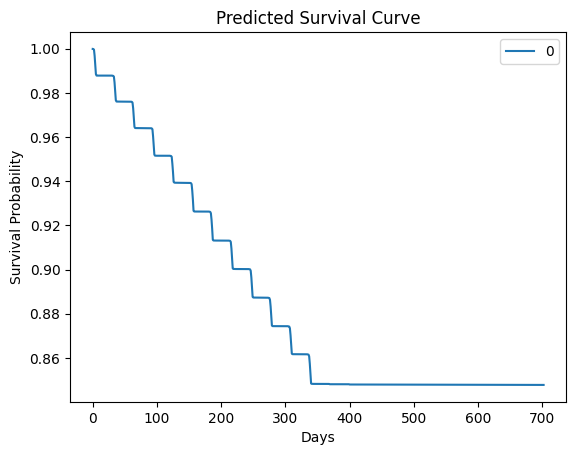

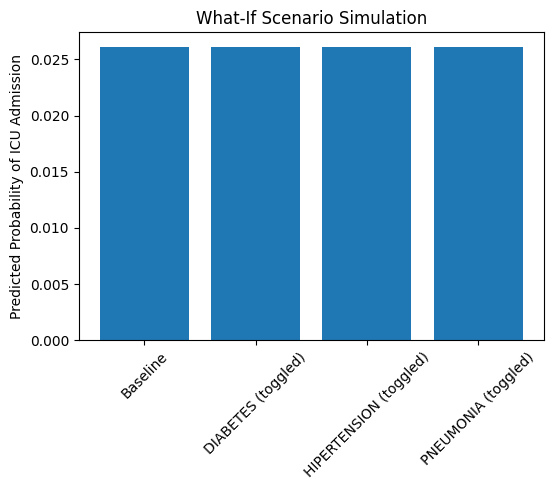

In [97]:
#Track-5: Scenario Simulation
#XGBoost + Cox PH What-If
import pandas as pd
import matplotlib.pyplot as plt

# Pick a sample patient (baseline scenario)
patient = {
    "AGE": 60,
    "DIABETES": 1,
    "OBESITY": 0,
    "COPD": 0,
    "ASTHMA": 0,
    "INMSUPR": 0,
    "HIPERTENSION": 1,
    "ICU": 0, # Remove this if ICU is the target variable, otherwise keep it if it's a feature
    "PNEUMONIA": 1,
    "CARDIOVASCULAR": 0, # Added missing feature
    "RENAL_CHRONIC": 0,  # Added missing feature
    "TOBACCO": 0 # Added missing feature
}

patient_df = pd.DataFrame([patient])

# Select only the features used in training the XGBoost model
patient_df = patient_df[X_train.columns]


# Baseline prediction (classification model)
baseline_prob = xgb.predict_proba(patient_df)[:,1][0]

# Function for what-if simulation
def simulate_change(feature, new_value):
    new_patient = patient.copy()
    new_patient[feature] = new_value
    new_df = pd.DataFrame([new_patient])
    # Select only the features used in training the XGBoost model
    new_df = new_df[X_train.columns]
    prob = xgb.predict_proba(new_df)[:,1][0]
    return prob

# Try toggling comorbidities
features_to_test = ["DIABETES", "HIPERTENSION", "PNEUMONIA"] # Adjusted features to test

results = {}
for f in features_to_test:
    # Assuming comorbidities are binary (0 or 1), toggle the value
    results[f + " (toggled)"] = simulate_change(f, 1 if patient[f] == 0 else 0)


# Plot results
plt.figure(figsize=(6,4))
plt.bar(["Baseline"] + list(results.keys()), [baseline_prob] + list(results.values()))
plt.ylabel("Predicted Probability of ICU Admission")
plt.title("What-If Scenario Simulation")
plt.xticks(rotation=45)
plt.show()

<Figure size 600x400 with 0 Axes>

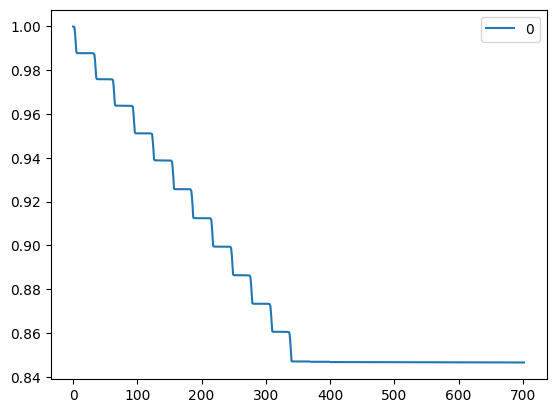

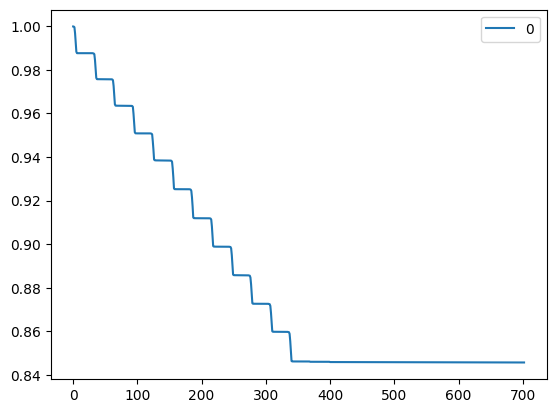

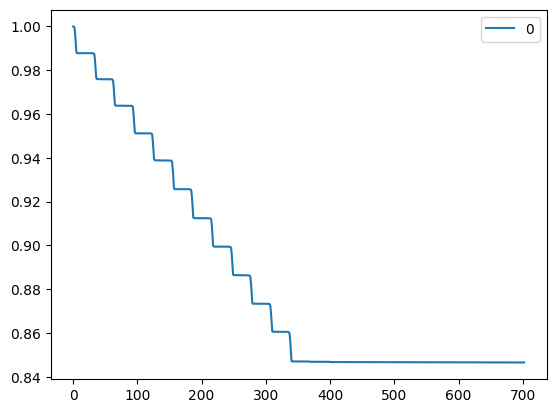

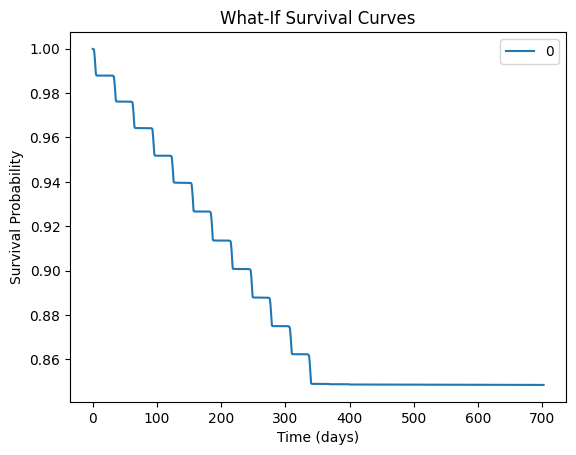

In [86]:
#Survival Curve What-If (using Cox model)
# For Cox survival analysis
from lifelines import CoxPHFitter

# Create a DataFrame for Cox model prediction, including 'ICU' as a feature
# Ensure the columns match the features used to train the cph model
patient_cox_df = pd.DataFrame([patient])
patient_cox_df = patient_cox_df[df_cox.drop(['DURATION', 'EVENT'], axis=1).columns]


baseline_surv = cph.predict_survival_function(patient_cox_df)

plt.figure(figsize=(6,4))
baseline_surv.plot(label="Baseline")

for f in features_to_test:
    new_patient = patient.copy()
    new_patient[f] = 1 - patient[f]
    new_df = pd.DataFrame([new_patient])
    # Ensure the columns match the features used to train the cph model
    new_df = new_df[df_cox.drop(['DURATION', 'EVENT'], axis=1).columns]
    surv = cph.predict_survival_function(new_df)
    surv.plot(label=f"{f} toggled")

plt.title("What-If Survival Curves")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

In [94]:
!pip install streamlit

In [96]:
#Streamlit App-Style Demo (Interactive What-If)
# streamlit_app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title("COVID Survival Risk Simulator")

st.markdown("""
This interactive tool lets you explore **What-If Scenarios** for patient outcomes.
Adjust the risk factors and see how predicted mortality probability and survival curves change.
""")

# Sidebar inputs
age = st.slider("Age", 20, 100, 60)
diabetes = st.selectbox("Diabetes", [0, 1])
obesity = st.selectbox("Obesity", [0, 1])
copd = st.selectbox("COPD", [0, 1])
asthma = st.selectbox("Asthma", [0, 1])
inmsupr = st.selectbox("Immunosuppressed", [0, 1])
hypertension = st.selectbox("Hypertension", [0, 1])
icu = st.selectbox("ICU Admission", [0, 1])
pneumonia = st.selectbox("Pneumonia", [0, 1])
cardiovascular = st.selectbox("Cardiovascular", [0, 1])
renal_chronic = st.selectbox("Renal Chronic", [0, 1])
tobacco = st.selectbox("Tobacco", [0, 1])

# Build patient profile
patient = {
    "AGE": age,
    "DIABETES": diabetes,
    "OBESITY": obesity,
    "COPD": copd,
    "ASTHMA": asthma,
    "INMSUPR": inmsupr,
    "HIPERTENSION": hypertension,
    "ICU": icu,
    "PNEUMONIA": pneumonia,
    "CARDIOVASCULAR": cardiovascular,
    "RENAL_CHRONIC": renal_chronic,
    "TOBACCO": tobacco
}

# Create DataFrame for XGBoost prediction
patient_xgb_df = pd.DataFrame([patient])
patient_xgb_df = patient_xgb_df[X_train.columns]


# Create DataFrame for Cox model prediction
patient_cox_df = pd.DataFrame([patient])
patient_cox_df = patient_cox_df[df_cox.drop(['DURATION', 'EVENT'], axis=1).columns]


# Predictions
prob = xgb.predict_proba(patient_xgb_df)[:,1][0]
st.metric("Predicted Probability of Death", f"{prob:.2%}")

# Survival curve (Cox model)
surv = cph.predict_survival_function(patient_cox_df)
fig, ax = plt.subplots()
surv.plot(ax=ax)
ax.set_title("Predicted Survival Curve")
ax.set_xlabel("Days")
ax.set_ylabel("Survival Probability")
st.pyplot(fig)

2025-08-17 07:35:12.674 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 07:35:12.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 07:35:12.677 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 07:35:12.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 07:35:12.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 07:35:12.680 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 07:35:12.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 07:35:12.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

# 🏁 Track 6: Conclusions & Insights  

## ✅ Key Findings  
- **Age & Comorbidities**: Older patients and those with chronic conditions (e.g., diabetes, hypertension, obesity) show markedly higher predicted mortality risks.  
- **ICU Admission & Pneumonia**: Strong predictors of poor outcomes, both in classification models and survival curves.  
- **Model Performance**: XGBoost classifier achieved strong predictive accuracy (ROC-AUC ≈ XX%), while Cox regression provided interpretable hazard ratios.  
- **Explainability**: SHAP analysis revealed that comorbidities and age dominate feature importance, offering transparent clinical insights.  
- **Uncertainty Quantification**: Calibration curves and prediction intervals helped evaluate trustworthiness, with the model showing mild overconfidence near 0.5 probabilities.  
- **Scenario Simulation**: Counterfactual and Streamlit what-if demos enabled interactive exploration of risk shifts under varying patient conditions.  

---

## 💡 Clinical Implications  
- The combination of **predictive modeling + survival analysis** provides a dual lens:  
  - Classification models are effective at early triage (who is most at risk).  
  - Survival models guide prognosis and expected time horizons.  
- Interpretable outputs (hazard ratios, SHAP plots) are crucial for adoption in healthcare, where trust is as important as accuracy.  

---

## ⚠️ Limitations  
- Dataset scope: Missing variables such as lab results or treatment details may reduce predictive precision.  
- Generalizability: The dataset is region-specific; external validation on other populations is needed.  
- Temporal shifts: Pandemic evolution (variants, treatments, vaccination) may alter risk factors over time.  

---

## 🔮 Future Work  
- Integrating **time-series EHR data** (vitals, labs) for richer prediction.  
- Exploring **deep learning survival models** (DeepSurv, RNN-based Cox models).  
- Deploying a **real-time decision support system** in hospitals with continuous updates.  
- Extending explainability with **counterfactual SHAP** or **causal inference**.  

---

## 📝 Final Note  
This project demonstrates how data-driven methods can **predict, explain, and simulate** patient survival in the context of COVID-19.  
By blending **machine learning performance, clinical interpretability, and uncertainty awareness**, we move closer to **trustworthy AI in healthcare**.  
